In [6]:
%pip install scikit-image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 2.2 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/12.9 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.8/12.9 MB 2.6 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.9 MB 2.6 MB/s eta 0:00:05
   -------- ------------------------------- 2.9/12.9 MB 2.5 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/12.9 MB 2.6 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.9 MB 2.6 MB/s eta 0:00:04
   ------------- -------------------------- 4.5/12.9 MB 2.6 MB/s eta 0:00:04
   ---------------- ----------------------- 5.2/12.9 MB 2.6 MB/s eta 0:00:03
   ----------------- ---------------------- 5.5/12.9 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.9 MB 2.5 MB/s eta 0:00:03
   ----------

In [5]:
%pip install scipy

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Note: you may need to restart the kernel to use updated packages.



File: PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
--------------------------------------------------
Patient ID: 149940
Study Date: 20240621
Modality: NM
Manufacturer: GE MEDICAL SYSTEMS
Image Size: 128x128

Image Statistics:
Shape: (120, 128, 128)
Data type: uint16
Min value: 0
Max value: 19
Mean value: 0.67


TypeError: Invalid shape (120, 128, 128) for image data

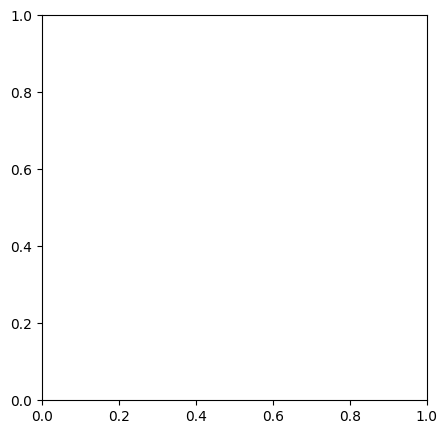

In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

def explore_dicom(filepath):
    """
    Explore a DICOM file and display its key metadata and image content.
    
    Args:
        filepath (str): Path to the DICOM file
    """
    # Read DICOM file
    ds = pydicom.dcmread(filepath)
    
    # Display basic metadata
    print(f"\nFile: {os.path.basename(filepath)}")
    print("-" * 50)
    print(f"Patient ID: {ds.PatientID if 'PatientID' in ds else 'N/A'}")
    print(f"Study Date: {ds.StudyDate if 'StudyDate' in ds else 'N/A'}")
    print(f"Modality: {ds.Modality if 'Modality' in ds else 'N/A'}")
    print(f"Manufacturer: {ds.Manufacturer if 'Manufacturer' in ds else 'N/A'}")
    print(f"Image Size: {ds.Rows}x{ds.Columns}")
    
    # Get pixel array and display basic statistics
    img = ds.pixel_array
    print(f"\nImage Statistics:")
    print(f"Shape: {img.shape}")
    print(f"Data type: {img.dtype}")
    print(f"Min value: {np.min(img)}")
    print(f"Max value: {img.max()}")
    print(f"Mean value: {np.mean(img):.2f}")
    
    # Display image
    plt.figure(figsize=(10, 5))
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.title(f"DICOM Image: {os.path.basename(filepath)}")
    plt.axis('off')
    plt.show()
    
    return ds, img

# Explore images in the Images folder
image_folder = "Images"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]

for image_file in image_files:
    filepath = os.path.join(image_folder, image_file)
    ds, img = explore_dicom(filepath)


File: PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
--------------------------------------------------
Patient ID: 149940
Study Date: 20240621
Modality: NM
Manufacturer: GE MEDICAL SYSTEMS
Image Size: 128x128

Image Statistics:
Shape: (120, 128, 128)
Data type: uint16
Min value: 0
Max value: 19
Mean value: 0.67


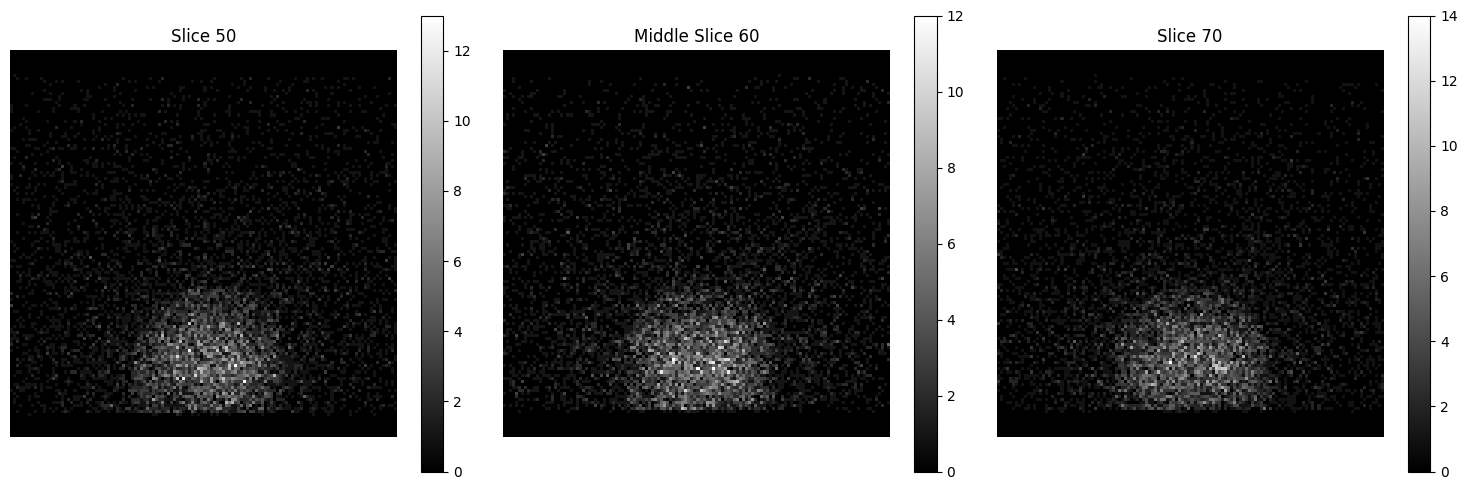


File: PPMI_3765_NM__br_raw_20240528081514274_.dcm
--------------------------------------------------
Patient ID: 3765
Study Date: 20240220
Modality: NM
Manufacturer: GE MEDICAL SYSTEMS
Image Size: 128x128

Image Statistics:
Shape: (120, 128, 128)
Data type: uint16
Min value: 0
Max value: 34
Mean value: 1.70


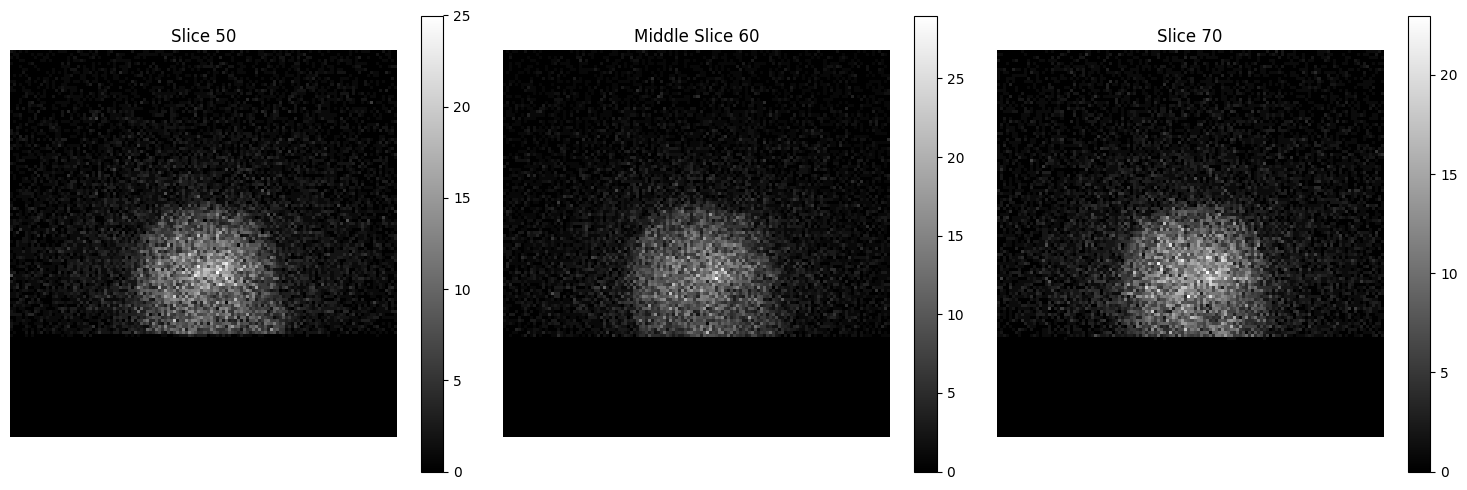

In [2]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

def explore_dicom(filepath):
    """
    Explore a DICOM file and display its key metadata and image content.
    
    Args:
        filepath (str): Path to the DICOM file
    """
    # Read DICOM file
    ds = pydicom.dcmread(filepath)
    
    # Display basic metadata
    print(f"\nFile: {os.path.basename(filepath)}")
    print("-" * 50)
    print(f"Patient ID: {ds.PatientID if 'PatientID' in ds else 'N/A'}")
    print(f"Study Date: {ds.StudyDate if 'StudyDate' in ds else 'N/A'}")
    print(f"Modality: {ds.Modality if 'Modality' in ds else 'N/A'}")
    print(f"Manufacturer: {ds.Manufacturer if 'Manufacturer' in ds else 'N/A'}")
    print(f"Image Size: {ds.Rows}x{ds.Columns}")
    
    # Get pixel array and display basic statistics
    img = ds.pixel_array
    print(f"\nImage Statistics:")
    print(f"Shape: {img.shape}")
    print(f"Data type: {img.dtype}")
    print(f"Min value: {np.min(img)}")
    print(f"Max value: {img.max()}")
    print(f"Mean value: {np.mean(img):.2f}")
    
    # Display image
    if len(img.shape) == 3:
        # For 3D images, show middle slice
        middle_slice = img.shape[0] // 2
        plt.figure(figsize=(15, 5))
        
        # Show three different slices
        plt.subplot(131)
        plt.imshow(img[middle_slice - 10], cmap='gray')
        plt.colorbar()
        plt.title(f"Slice {middle_slice - 10}")
        plt.axis('off')
        
        plt.subplot(132)
        plt.imshow(img[middle_slice], cmap='gray')
        plt.colorbar()
        plt.title(f"Middle Slice {middle_slice}")
        plt.axis('off')
        
        plt.subplot(133)
        plt.imshow(img[middle_slice + 10], cmap='gray')
        plt.colorbar()
        plt.title(f"Slice {middle_slice + 10}")
        plt.axis('off')
    else:
        plt.figure(figsize=(10, 5))
        plt.imshow(img, cmap='gray')
        plt.colorbar()
        plt.title(f"DICOM Image: {os.path.basename(filepath)}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return ds, img

# Explore images in the Images folder
image_folder = "Images"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]

for image_file in image_files:
    filepath = os.path.join(image_folder, image_file)
    ds, img = explore_dicom(filepath)


File: PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm
--------------------------------------------------
Patient ID: 149940
Study Date: 20240621
Modality: NM
Manufacturer: GE MEDICAL SYSTEMS
Image Size: 128x128

Image Statistics:
Shape: (120, 128, 128)
Data type: uint16
Min value: 0
Max value: 19
Mean value: 0.67


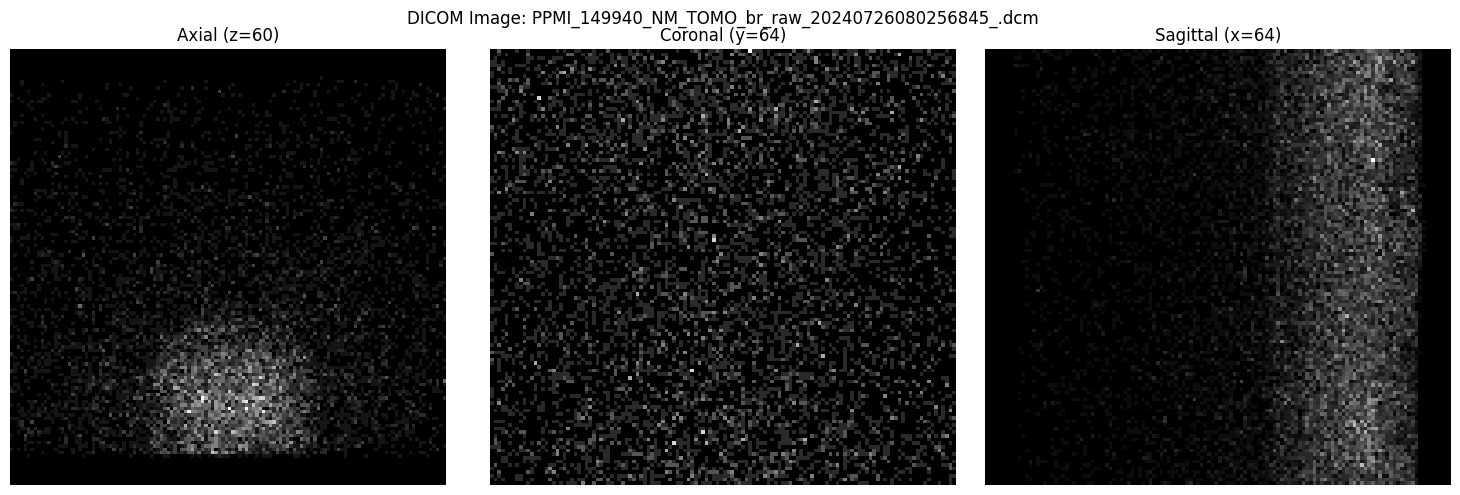


File: PPMI_3765_NM__br_raw_20240528081514274_.dcm
--------------------------------------------------
Patient ID: 3765
Study Date: 20240220
Modality: NM
Manufacturer: GE MEDICAL SYSTEMS
Image Size: 128x128

Image Statistics:
Shape: (120, 128, 128)
Data type: uint16
Min value: 0
Max value: 34
Mean value: 1.70


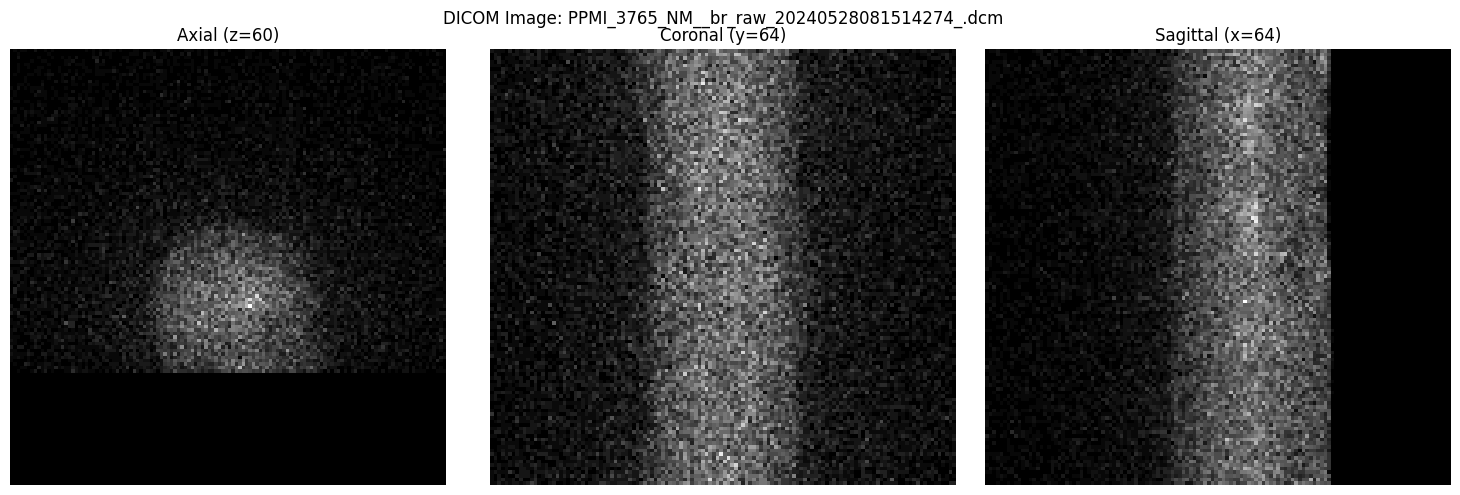

In [3]:
import os
import pydicom
import matplotlib.pyplot as plt
import numpy as np

def explore_dicom(filepath):
    """
    Explore a DICOM file and display its key metadata and image content along all three axes.
    
    Args:
        filepath (str): Path to the DICOM file
    """
    # Read DICOM file
    ds = pydicom.dcmread(filepath)
    
    # Display basic metadata
    print(f"\nFile: {os.path.basename(filepath)}")
    print("-" * 50)
    print(f"Patient ID: {ds.PatientID if 'PatientID' in ds else 'N/A'}")
    print(f"Study Date: {ds.StudyDate if 'StudyDate' in ds else 'N/A'}")
    print(f"Modality: {ds.Modality if 'Modality' in ds else 'N/A'}")
    print(f"Manufacturer: {ds.Manufacturer if 'Manufacturer' in ds else 'N/A'}")
    print(f"Image Size: {ds.Rows}x{ds.Columns}")
    
    # Get pixel array and display basic statistics
    img = ds.pixel_array
    print(f"\nImage Statistics:")
    print(f"Shape: {img.shape}")
    print(f"Data type: {img.dtype}")
    print(f"Min value: {np.min(img)}")
    print(f"Max value: {img.max()}")
    print(f"Mean value: {np.mean(img):.2f}")
    
    if len(img.shape) == 3:
        # Get middle slices for each axis
        z_mid, y_mid, x_mid = [shape//2 for shape in img.shape]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Axial view (top-down)
        axes[0].imshow(img[z_mid], cmap='gray')
        axes[0].set_title(f'Axial (z={z_mid})')
        axes[0].axis('off')
        
        # Coronal view (front-back)
        axes[1].imshow(img[:, y_mid, :], cmap='gray')
        axes[1].set_title(f'Coronal (y={y_mid})')
        axes[1].axis('off')
        
        # Sagittal view (side)
        axes[2].imshow(img[:, :, x_mid], cmap='gray')
        axes[2].set_title(f'Sagittal (x={x_mid})')
        axes[2].axis('off')
        
        plt.suptitle(f"DICOM Image: {os.path.basename(filepath)}")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(10, 5))
        plt.imshow(img, cmap='gray')
        plt.colorbar()
        plt.title(f"2D DICOM Image: {os.path.basename(filepath)}")
        plt.axis('off')
        plt.show()
    
    return ds, img

# Explore images in the Images folder
image_folder = "Images"
image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]

for image_file in image_files:
    filepath = os.path.join(image_folder, image_file)
    ds, img = explore_dicom(filepath)

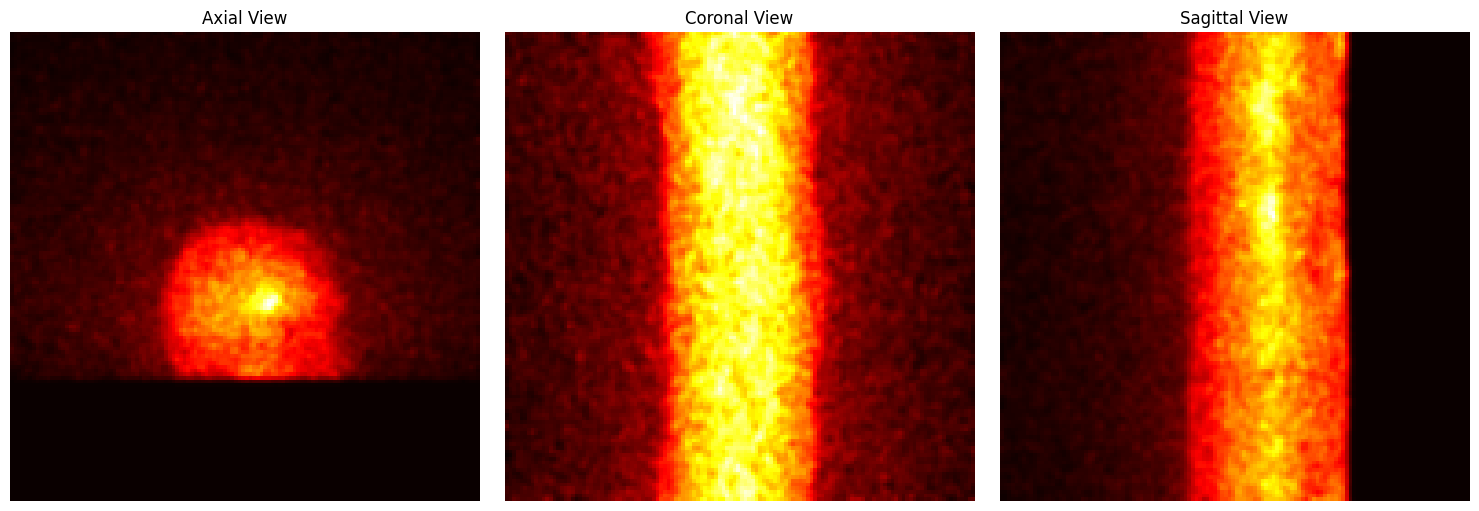

In [10]:
import numpy as np
import pydicom
from pathlib import Path
from typing import Tuple, Dict
from scipy import ndimage
import matplotlib.pyplot as plt
import os

class DaTScanPreprocessor:
    def __init__(self, target_shape: Tuple[int, int, int] = (128, 128, 128)):
        self.target_shape = target_shape
        
    def load_and_preprocess(self, file_path: str) -> Dict:
        """Load and preprocess a single DaTSCAN SPECT image"""
        ds = pydicom.dcmread(file_path)
        img = ds.pixel_array.astype(float)
        
        # Basic preprocessing
        processed_img = self._preprocess_volume(img)
        
        # Extract key views
        mid_slices = self._extract_mid_slices(processed_img)
        
        return {
            'volume': processed_img,
            'mid_slices': mid_slices,
            'metadata': self._extract_metadata(ds)
        }
    
    def _preprocess_volume(self, img: np.ndarray) -> np.ndarray:
        """Preprocess 3D SPECT volume"""
        # Normalize intensity
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        
        # Apply Gaussian smoothing to reduce noise (common in SPECT)
        img = ndimage.gaussian_filter(img, sigma=0.8)
        
        # Resize if needed
        if img.shape != self.target_shape:
            zoom_factors = tuple(t/c for t, c in zip(self.target_shape, img.shape))
            img = ndimage.zoom(img, zoom_factors, order=3)
        
        return img
    
    def _extract_mid_slices(self, img: np.ndarray) -> Dict[str, np.ndarray]:
        """Extract middle slices from all three views"""
        z, y, x = [shape//2 for shape in img.shape]
        
        return {
            'axial': img[z],      # Top-down view, most important for striatum
            'coronal': img[:, y], # Front-back view
            'sagittal': img[:, :, x]  # Side view
        }
    
    def _extract_metadata(self, ds: pydicom.dataset.FileDataset) -> Dict:
        """Extract relevant SPECT-specific metadata"""
        return {
            'patient_id': getattr(ds, 'PatientID', 'unknown'),
            'study_date': getattr(ds, 'StudyDate', 'unknown'),
            'manufacturer': getattr(ds, 'Manufacturer', 'unknown'),
            'scanner_model': getattr(ds, 'ManufacturerModelName', 'unknown'),
            'pixel_spacing': getattr(ds, 'PixelSpacing', None),
            'slice_thickness': getattr(ds, 'SliceThickness', None)
        }
    
    def visualize_slices(self, processed_data: Dict):
        """Visualize the three main views of the SPECT image"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        views = ['axial', 'coronal', 'sagittal']
        
        for ax, view in zip(axes, views):
            ax.imshow(processed_data['mid_slices'][view], cmap='hot')
            ax.set_title(f'{view.capitalize()} View')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    preprocessor = DaTScanPreprocessor()
    # List all DICOM files in Images folder
    image_folder = "Images"
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]
    
    for image_file in image_files:
        file_path = os.path.join(image_folder, image_file)
    
    try:
        processed_data = preprocessor.load_and_preprocess(file_path)
        preprocessor.visualize_slices(processed_data)
    except Exception as e:
        print(f"Error processing file: {e}")


Processing PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm...

Applying nlm denoising...


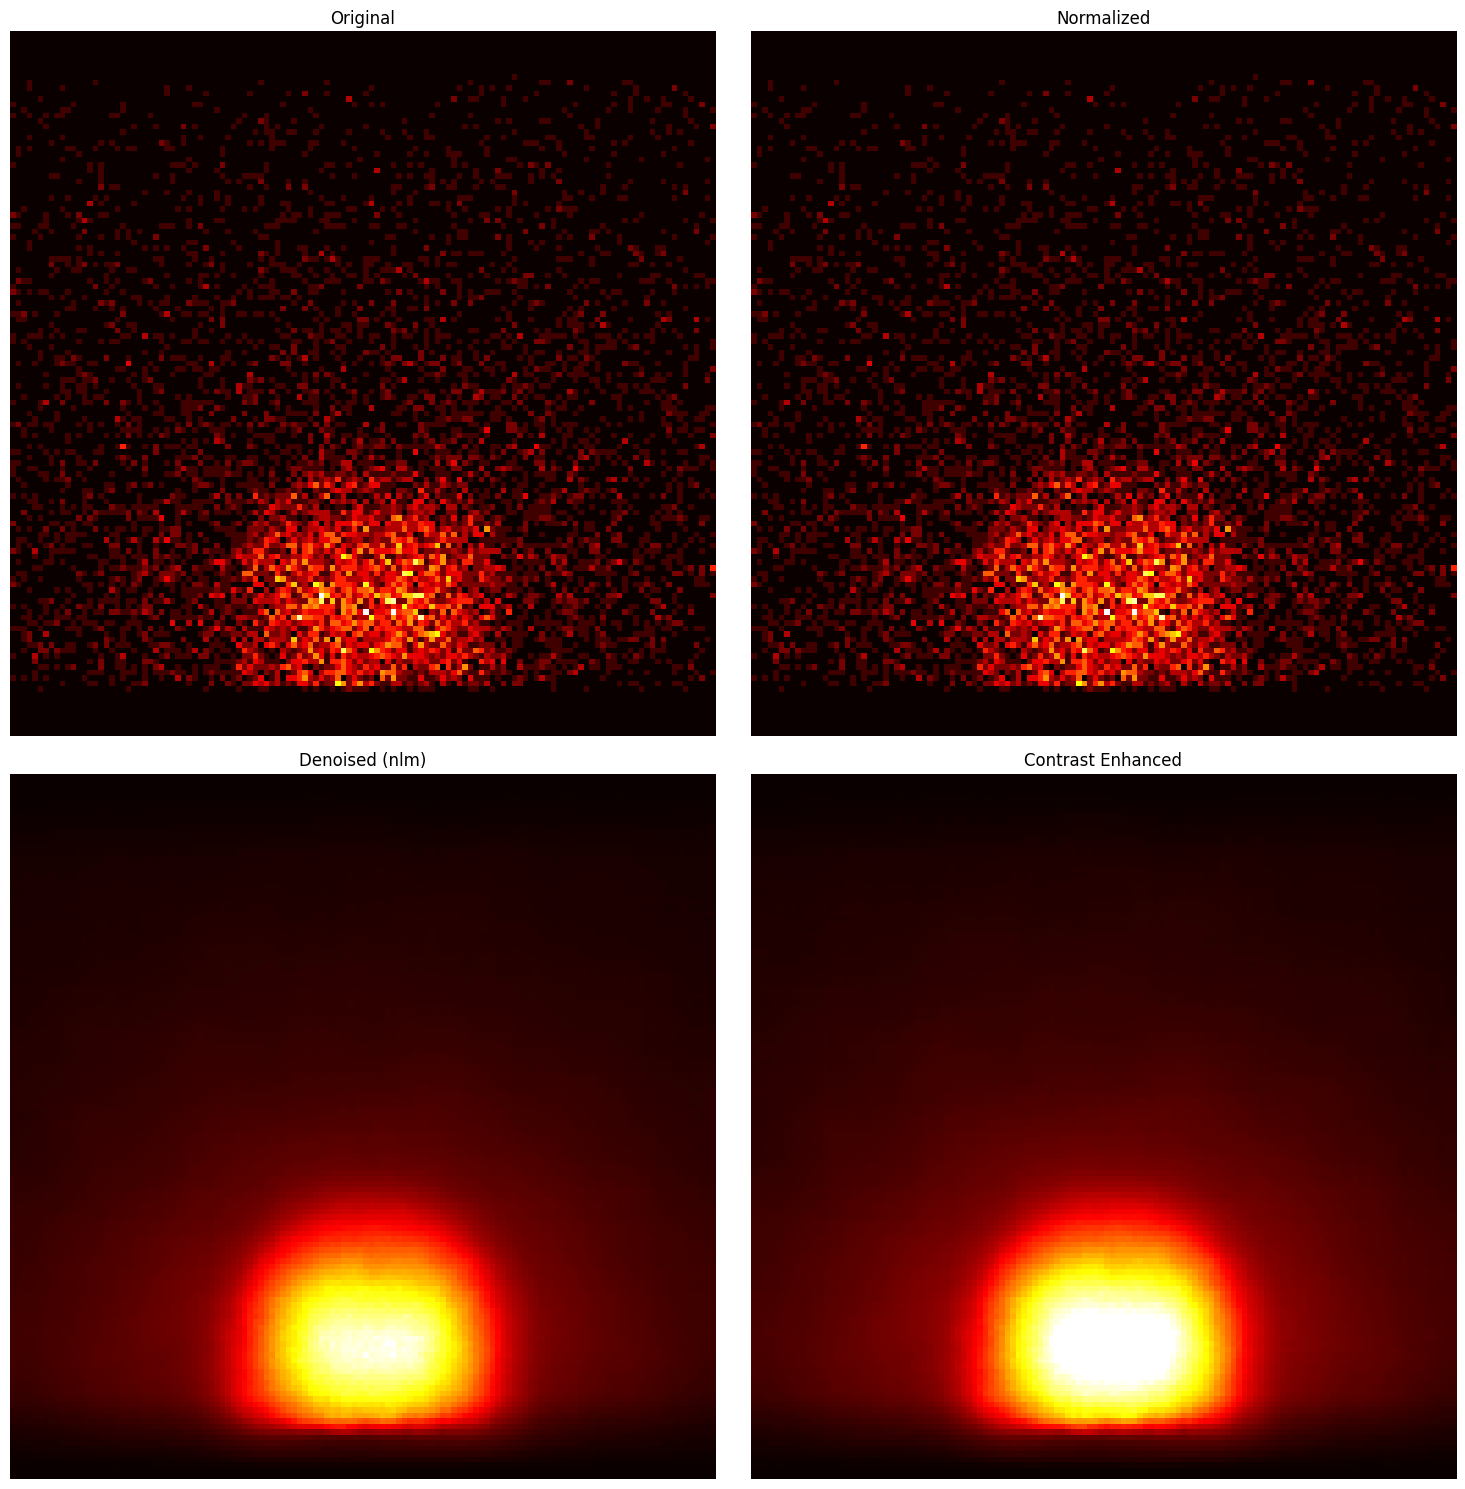

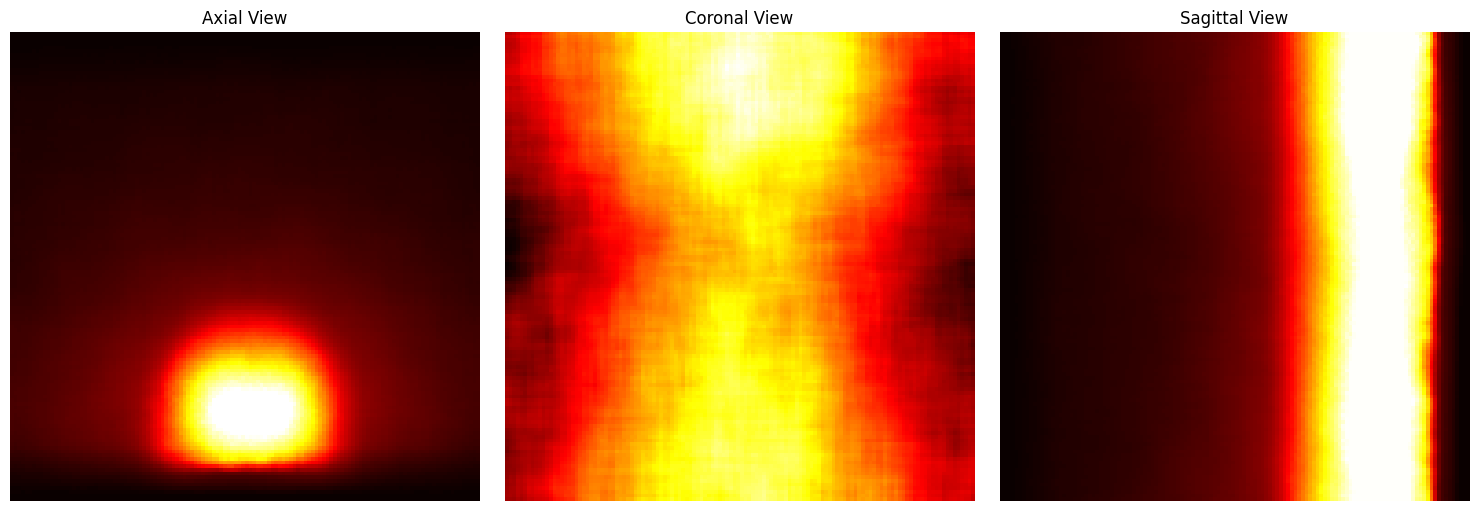


Applying tv denoising...


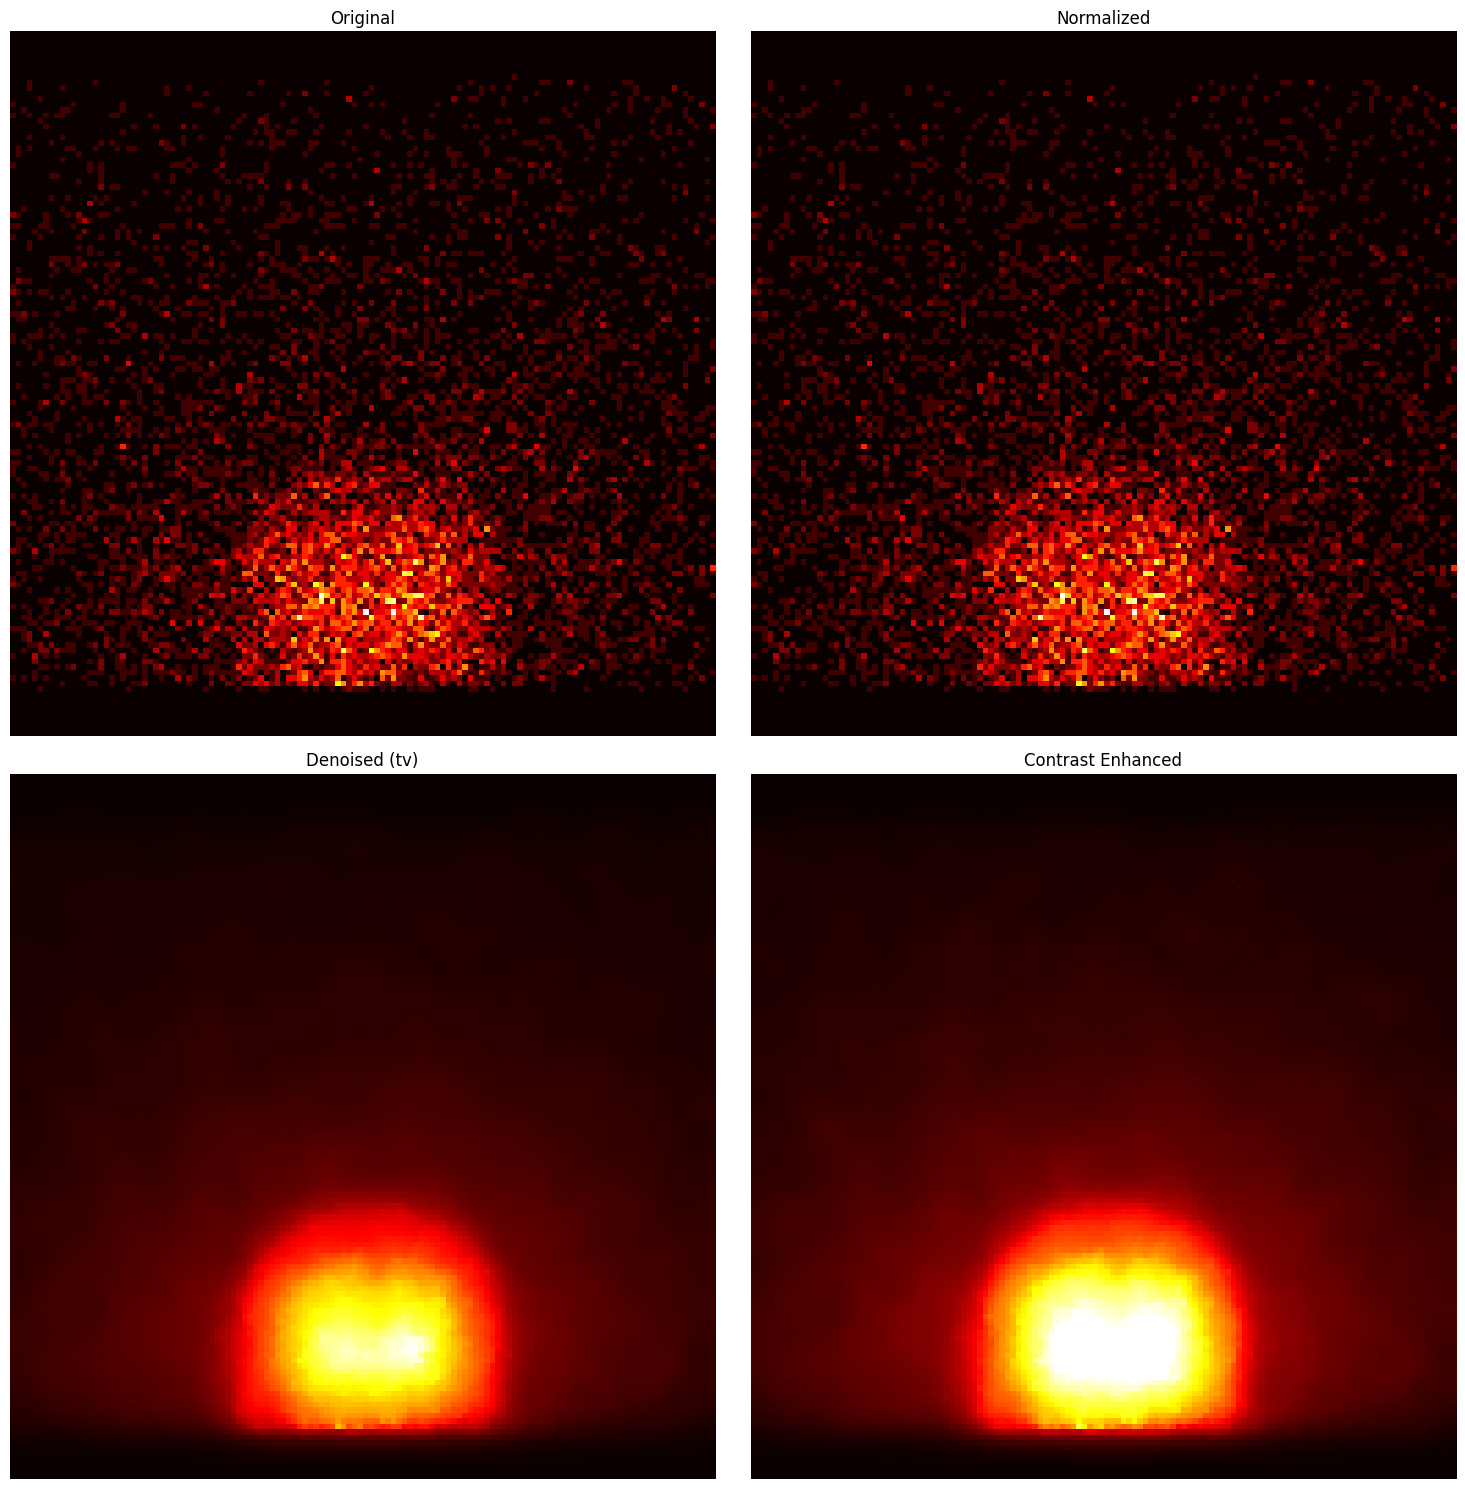

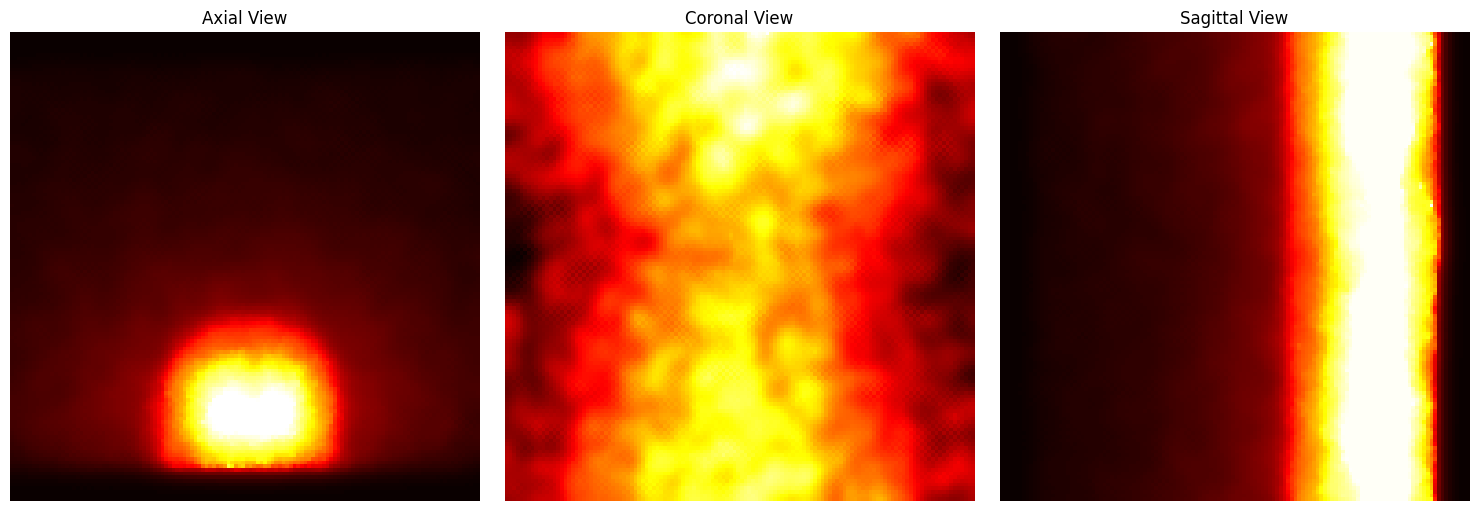


Applying wavelet denoising...
Error processing file with wavelet: PyWavelets is not installed. Please ensure it is installed in order to use this function.

Applying gaussian denoising...


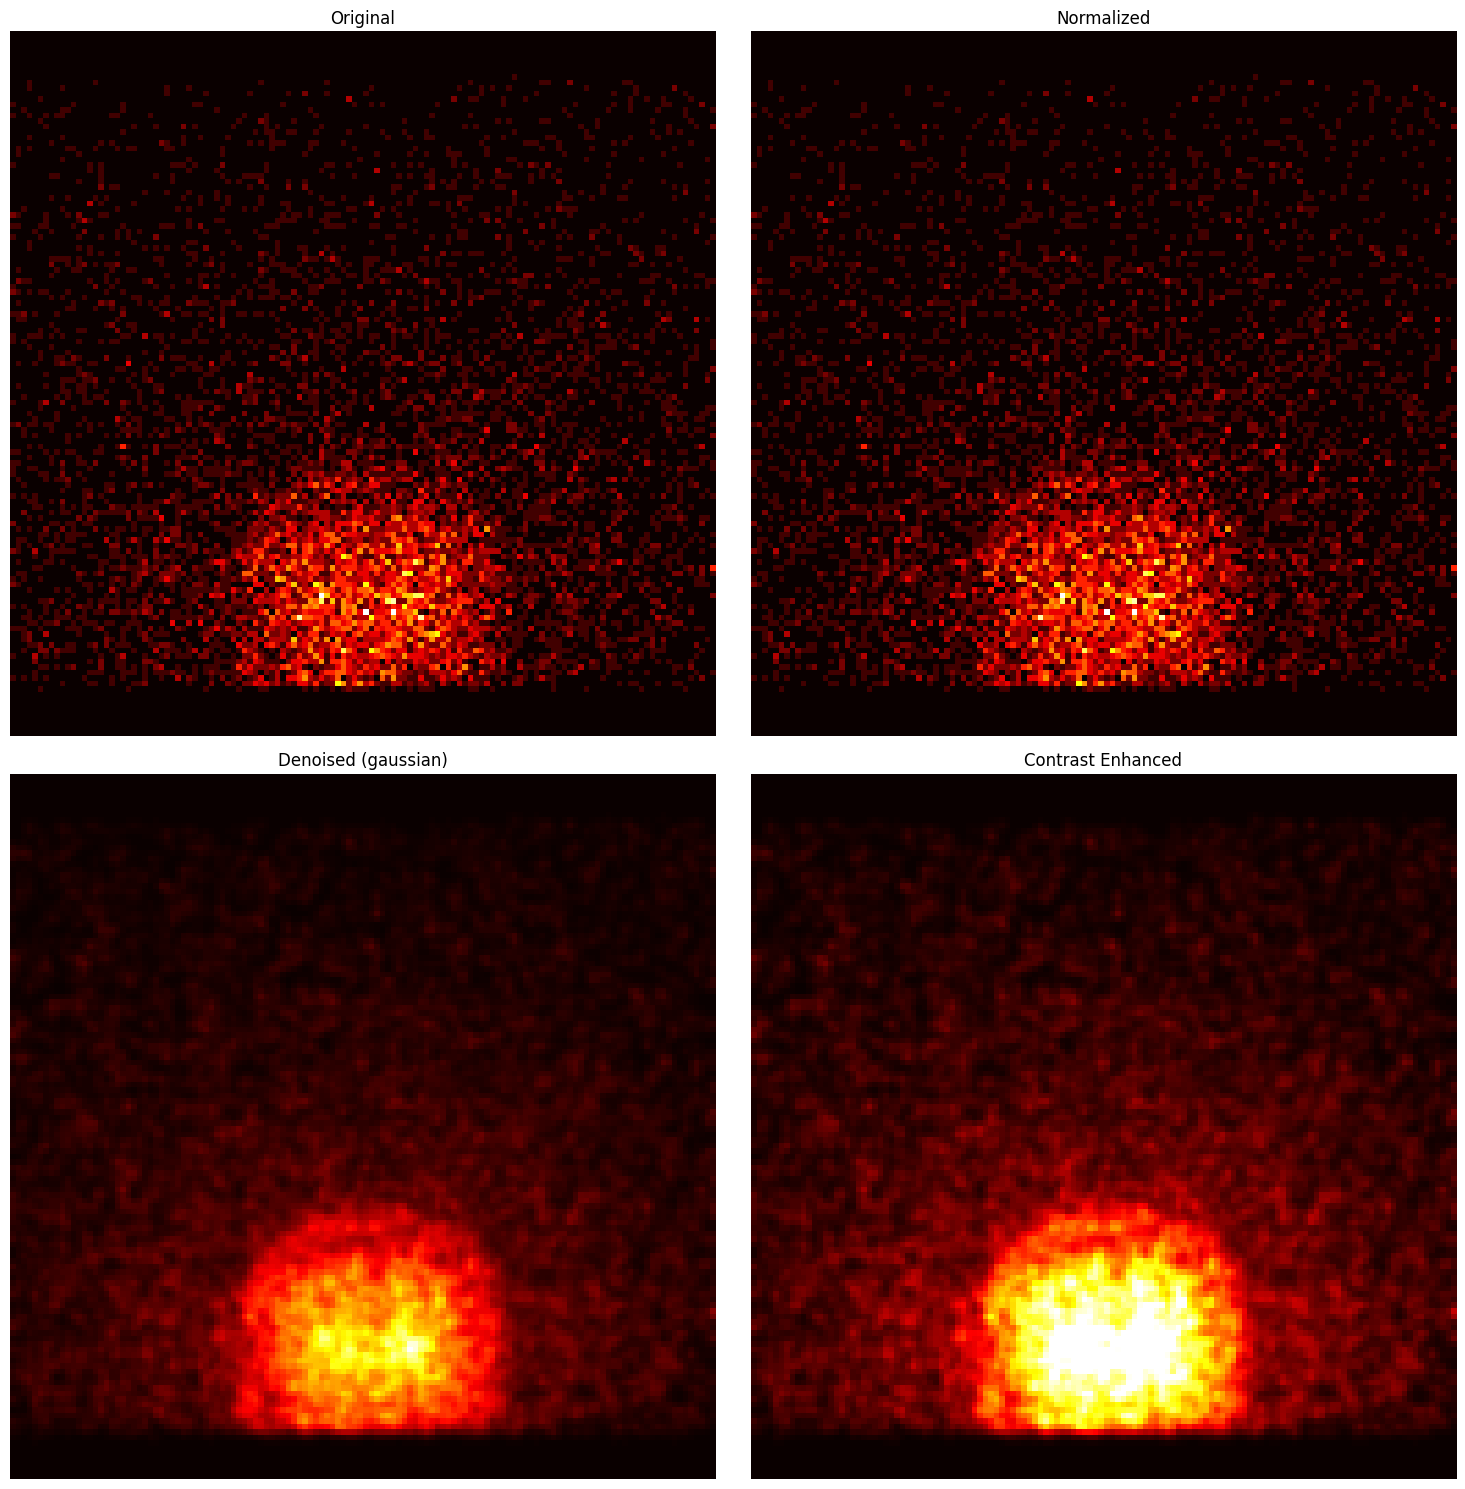

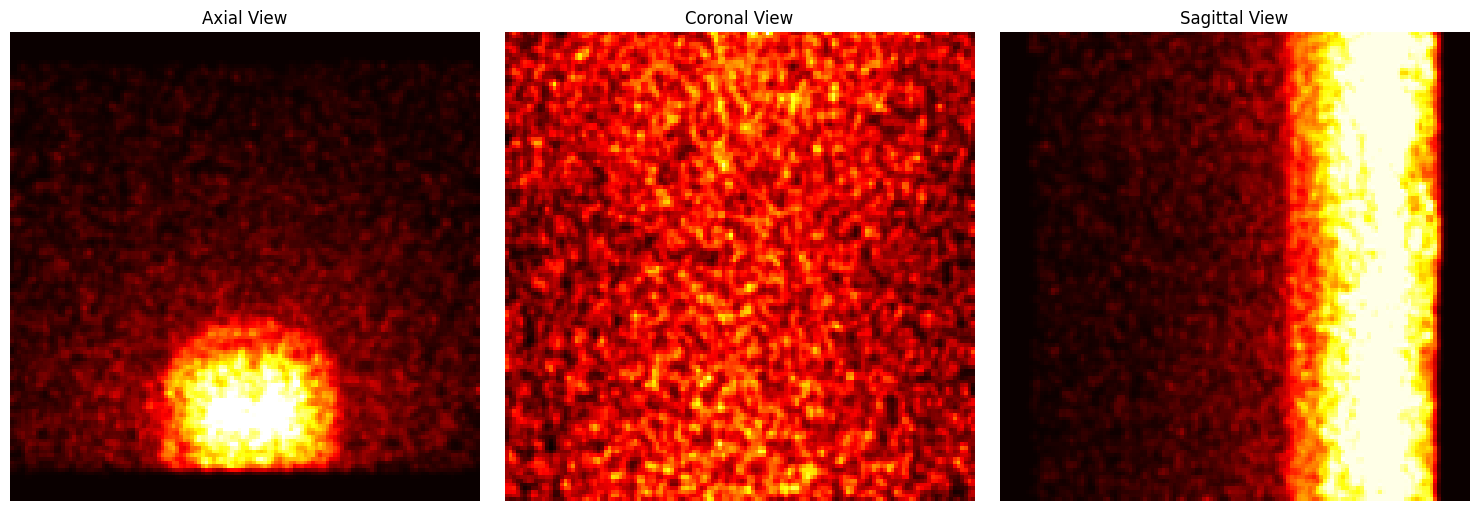


Processing PPMI_3765_NM__br_raw_20240528081514274_.dcm...

Applying nlm denoising...


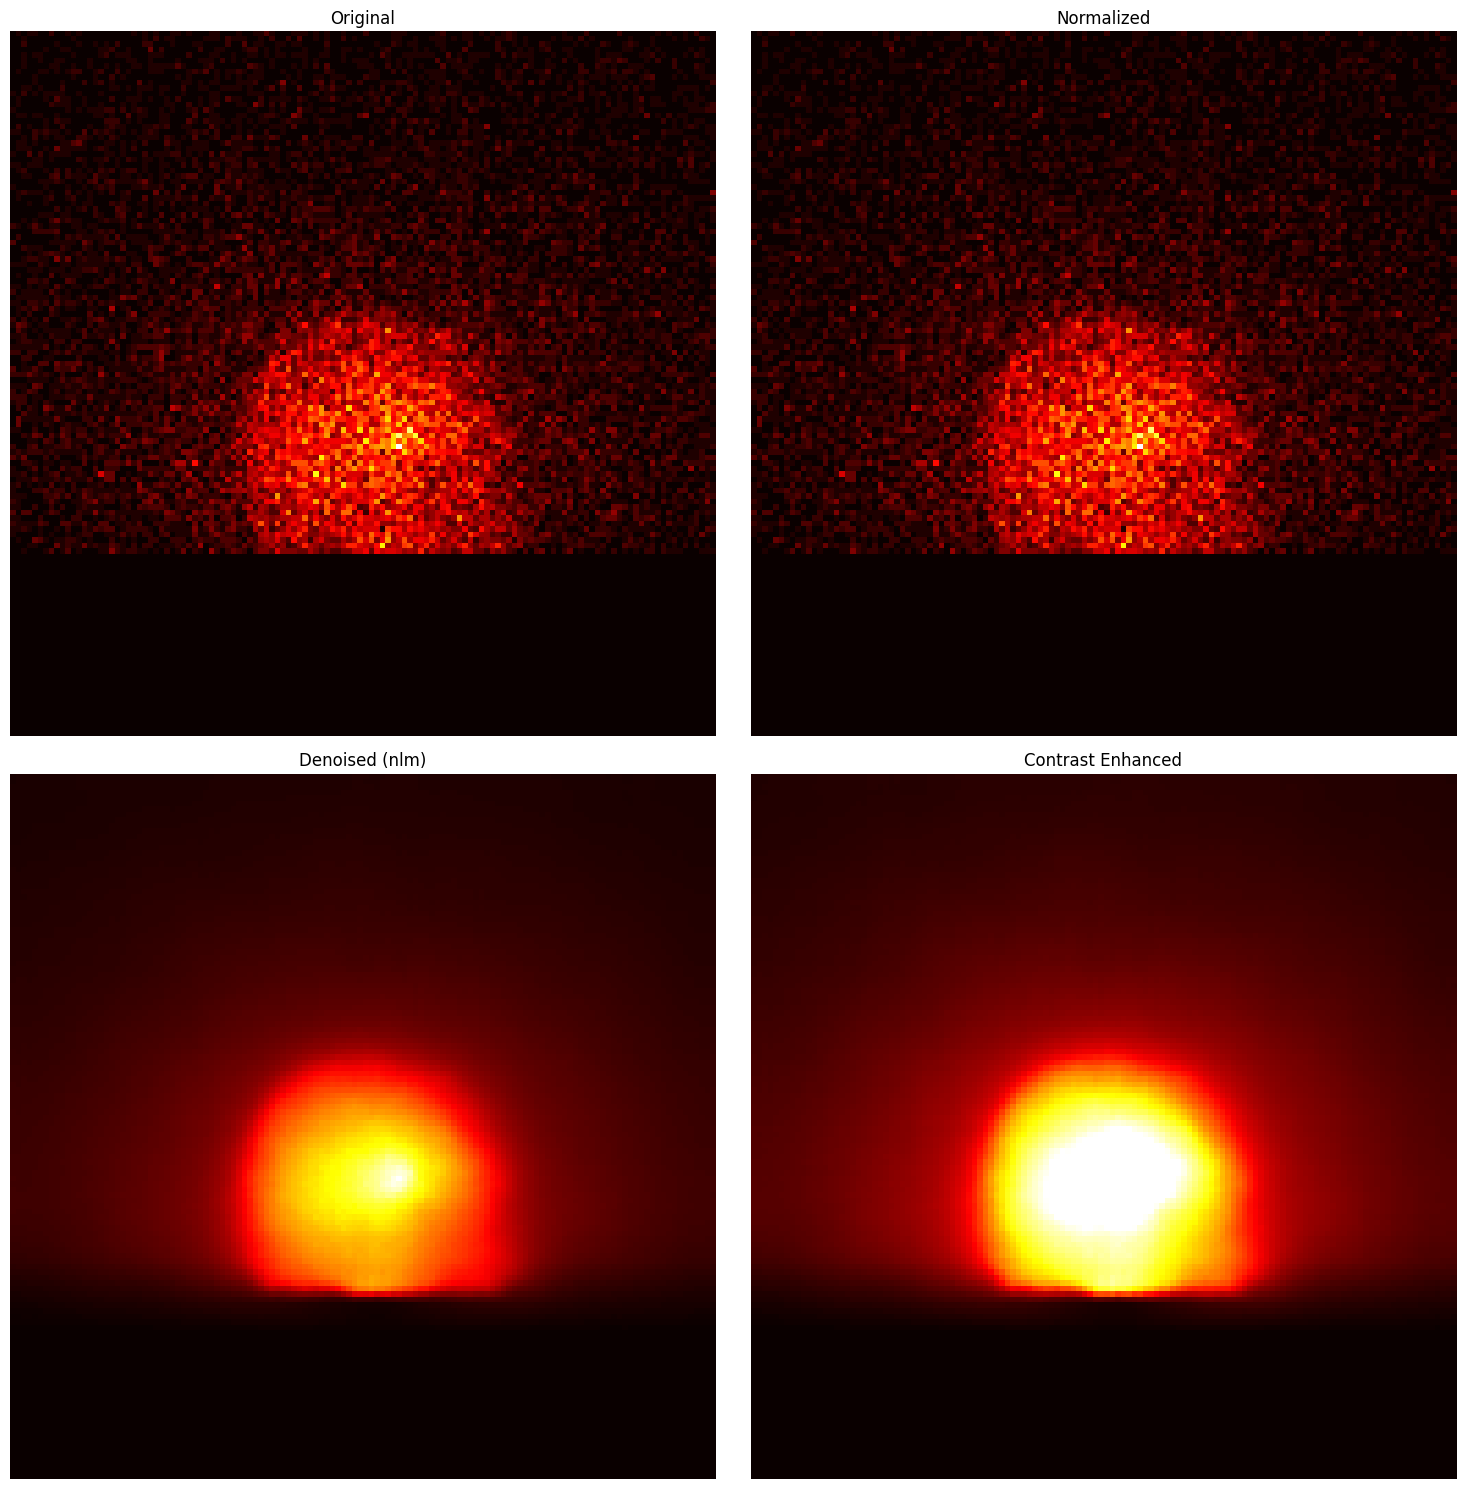

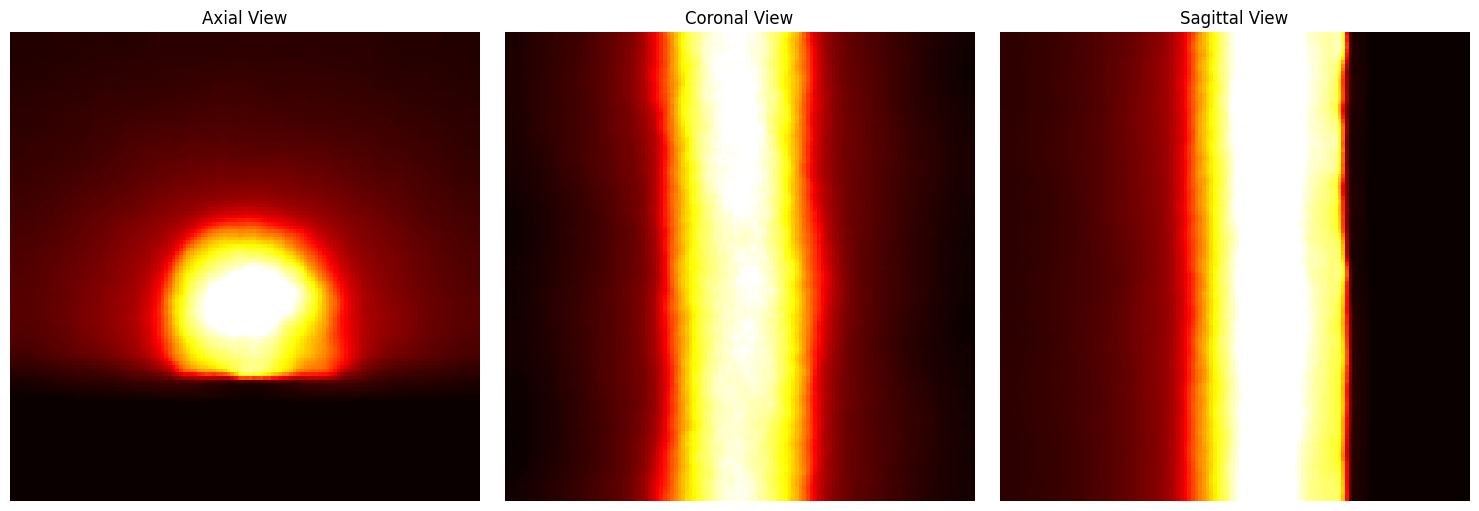


Applying tv denoising...


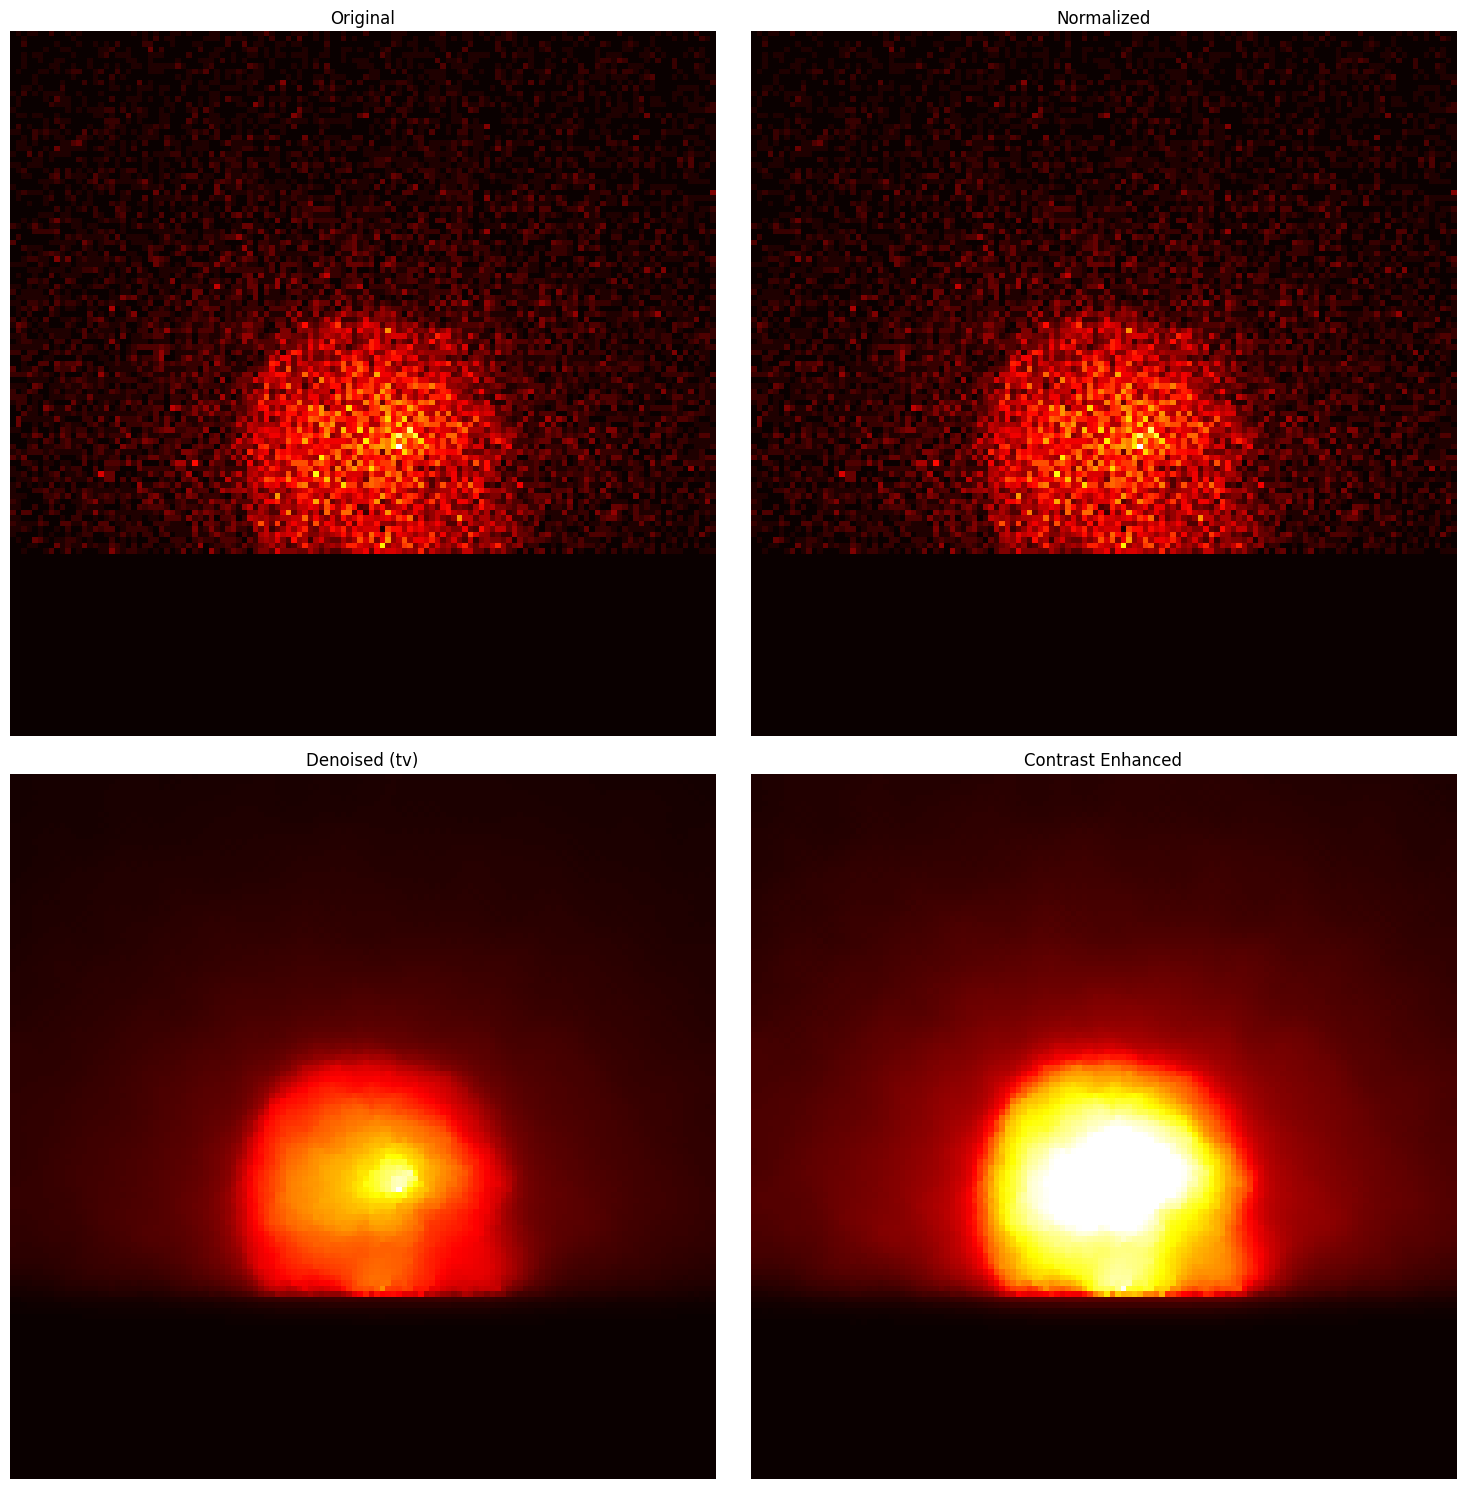

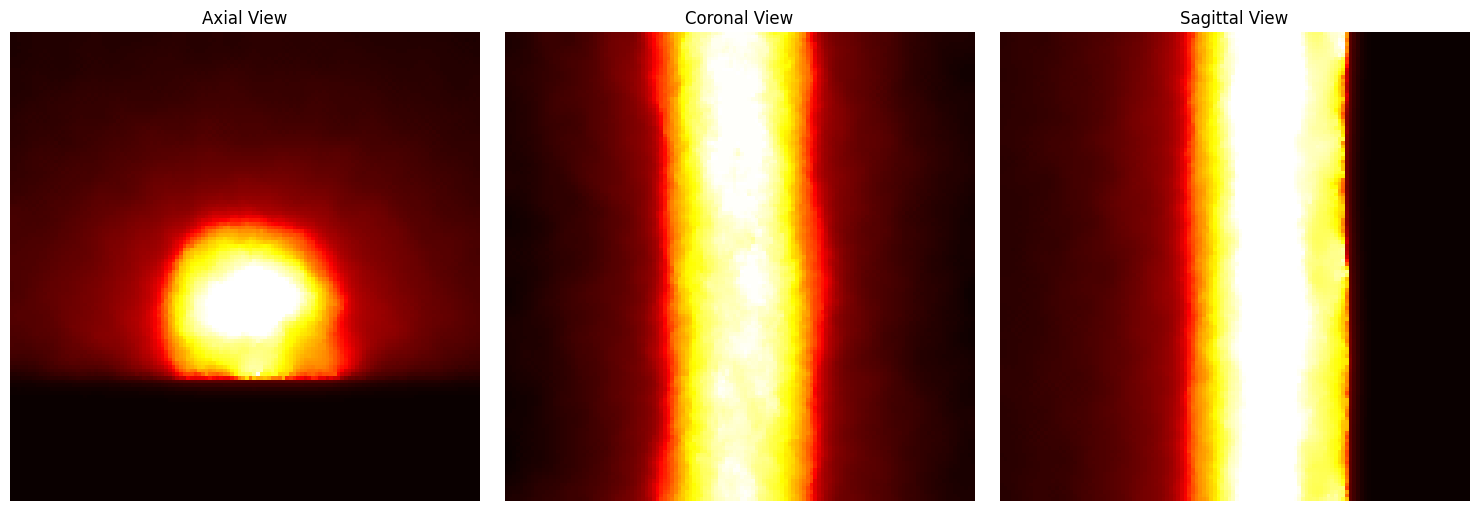


Applying wavelet denoising...
Error processing file with wavelet: PyWavelets is not installed. Please ensure it is installed in order to use this function.

Applying gaussian denoising...


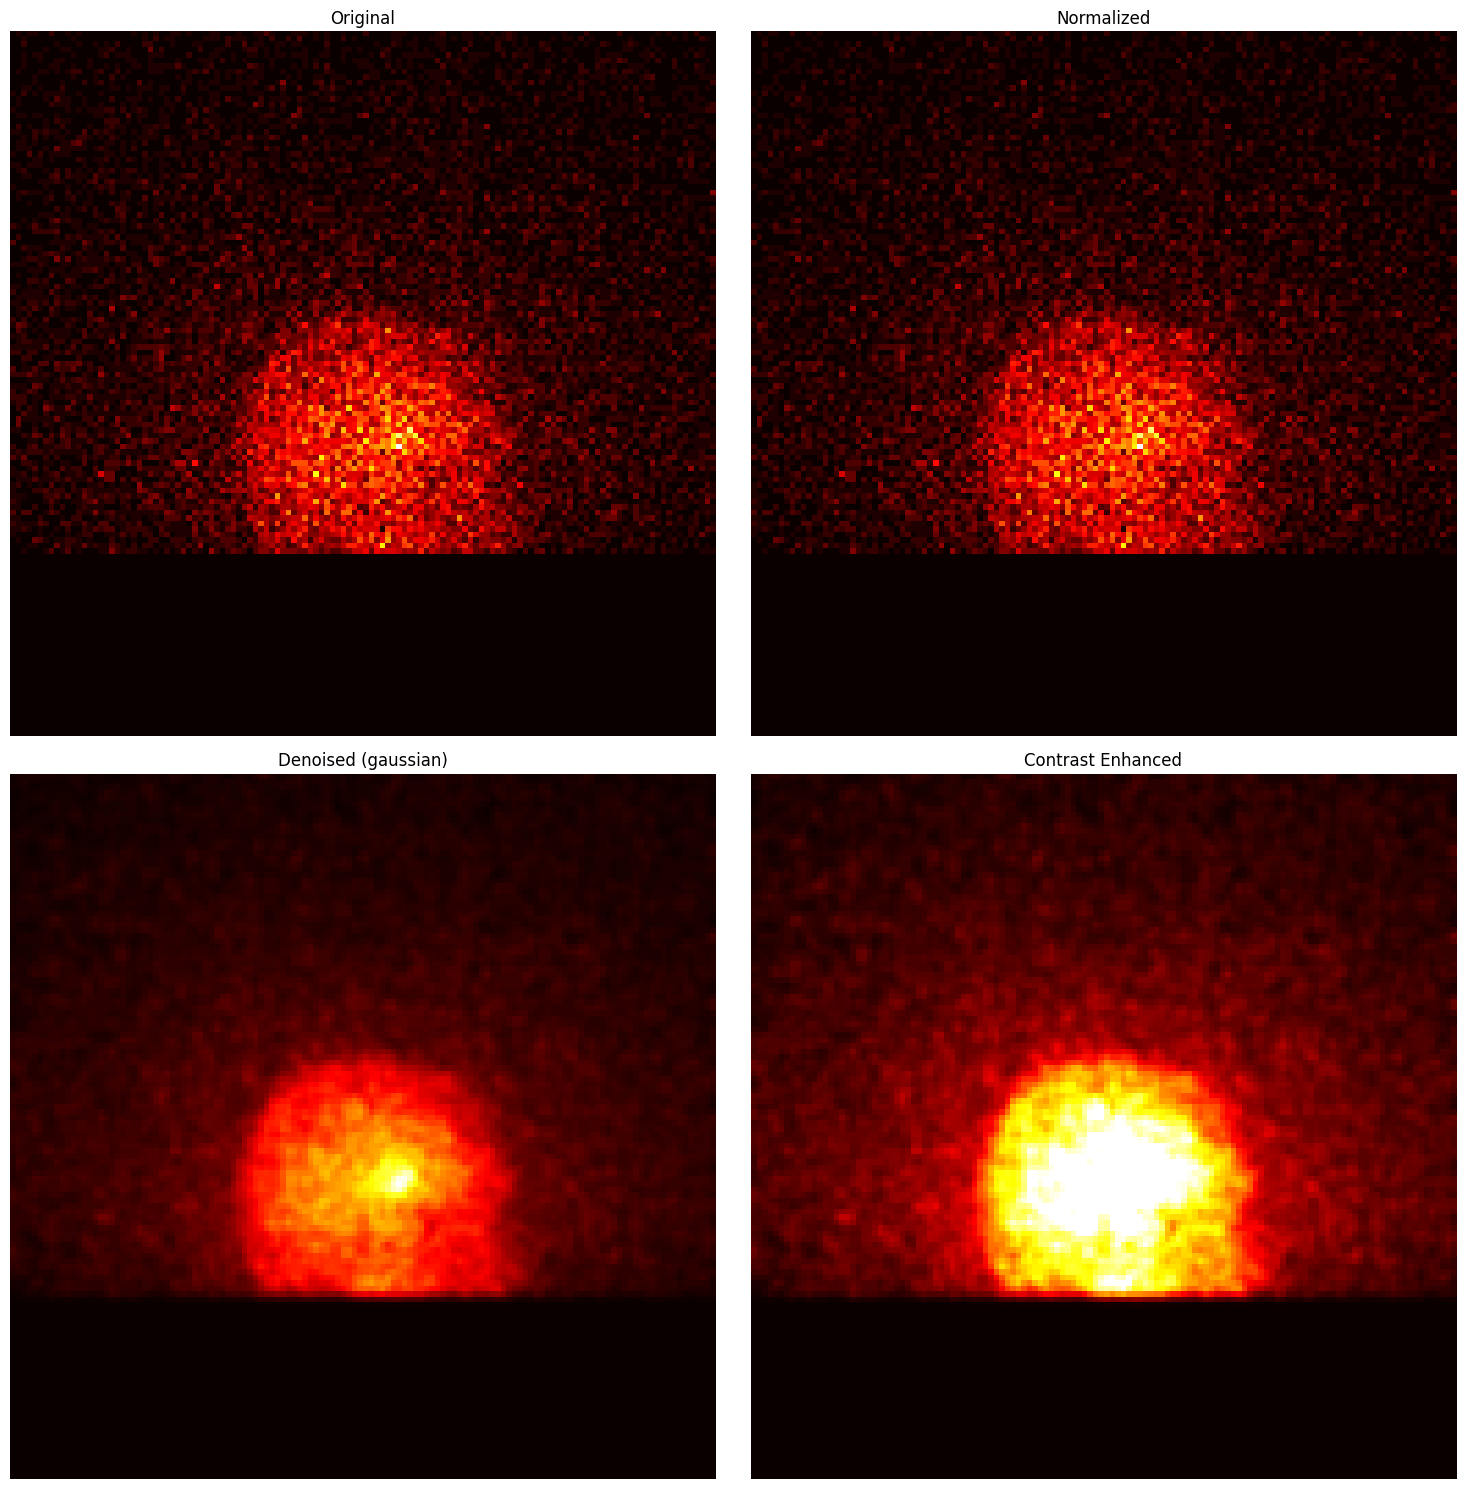

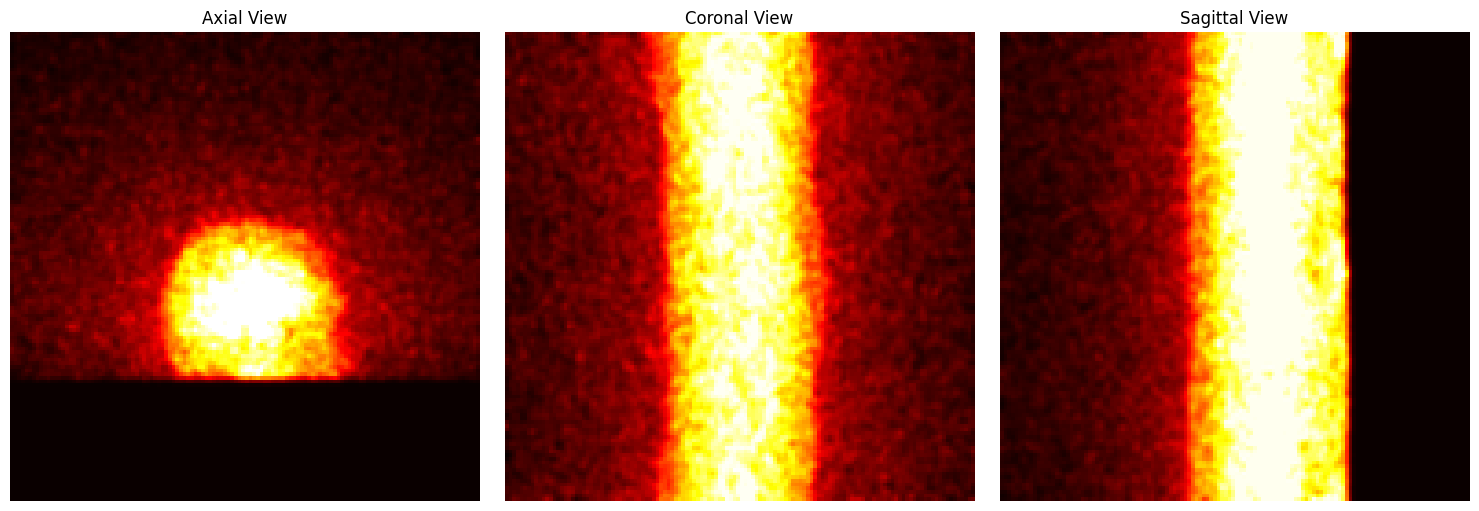

In [8]:
import numpy as np
import pydicom
from pathlib import Path
from typing import Tuple, Dict, Optional
from scipy import ndimage
from skimage.restoration import denoise_nl_means, denoise_tv_chambolle, denoise_wavelet
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import os

class EnhancedDaTScanProcessor:
    def __init__(self, 
                 target_shape: Tuple[int, int, int] = (128, 128, 128),
                 denoising_method: str = 'nlm'):
        """
        Initialize the DaTSCAN processor.
        
        Args:
            target_shape: Desired output shape for the volume
            denoising_method: One of ['nlm', 'tv', 'wavelet', 'gaussian']
        """
        self.target_shape = target_shape
        self.denoising_method = denoising_method
        
    def load_and_preprocess(self, file_path: str) -> Dict:
        """Load and preprocess a single DaTSCAN SPECT image"""
        ds = pydicom.dcmread(file_path)
        img = ds.pixel_array.astype(float)
        
        # Preprocessing pipeline
        processed_img = self._preprocess_pipeline(img)
        
        # Extract standard views
        mid_slices = self._extract_mid_slices(processed_img)
        
        return {
            'volume': processed_img,
            'mid_slices': mid_slices,
            'metadata': self._extract_metadata(ds)
        }
    
    def _preprocess_pipeline(self, img: np.ndarray) -> np.ndarray:
        """Complete preprocessing pipeline"""
        # Initial normalization
        img = self._normalize_intensity(img)
        
        # Apply chosen denoising method
        img = self._apply_denoising(img)
        
        # Contrast enhancement
        img = self._enhance_contrast(img)
        
        # Resize if needed
        if img.shape != self.target_shape:
            img = self._resize_volume(img)
            
        return img
    
    def _normalize_intensity(self, img: np.ndarray) -> np.ndarray:
        """Normalize image intensity to [0,1] range"""
        img = img_as_float(img)
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        return img
    
    def _apply_denoising(self, img: np.ndarray) -> np.ndarray:
        """Apply the selected denoising method"""
        if self.denoising_method == 'nlm':
            # Non-local means denoising - good for preserving edges
            return denoise_nl_means(img, patch_size=5, patch_distance=6, 
                                  h=0.1, channel_axis=None)
        
        elif self.denoising_method == 'tv':
            # Total Variation denoising - good for preserving edges while removing noise
            return denoise_tv_chambolle(img, weight=0.1, channel_axis=None)
        
        elif self.denoising_method == 'wavelet':
            # Wavelet denoising - good for preserving important features
            return denoise_wavelet(img, wavelet='db1', mode='soft',
                                 wavelet_levels=3, channel_axis=None)
        
        elif self.denoising_method == 'gaussian':
            # Traditional Gaussian smoothing
            return ndimage.gaussian_filter(img, sigma=0.8)
        
        else:
            raise ValueError(f"Unknown denoising method: {self.denoising_method}")
    
    def _enhance_contrast(self, img: np.ndarray) -> np.ndarray:
        """Enhance image contrast using adaptive histogram equalization"""
        # Apply contrast stretching
        p2, p98 = np.percentile(img, (2, 98))
        img = np.clip(img, p2, p98)
        img = (img - p2) / (p98 - p2)
        return img
    
    def _resize_volume(self, img: np.ndarray) -> np.ndarray:
        """Resize volume to target shape using cubic interpolation"""
        zoom_factors = tuple(t/c for t, c in zip(self.target_shape, img.shape))
        return ndimage.zoom(img, zoom_factors, order=3)
    
    def _extract_mid_slices(self, img: np.ndarray) -> Dict[str, np.ndarray]:
        """Extract middle slices from all three views"""
        z, y, x = [shape//2 for shape in img.shape]
        return {
            'axial': img[z],
            'coronal': img[:, y],
            'sagittal': img[:, :, x]
        }
    
    def _extract_metadata(self, ds: pydicom.dataset.FileDataset) -> Dict:
        """Extract relevant SPECT-specific metadata"""
        return {
            'patient_id': getattr(ds, 'PatientID', 'unknown'),
            'study_date': getattr(ds, 'StudyDate', 'unknown'),
            'manufacturer': getattr(ds, 'Manufacturer', 'unknown'),
            'scanner_model': getattr(ds, 'ManufacturerModelName', 'unknown'),
            'pixel_spacing': getattr(ds, 'PixelSpacing', None),
            'slice_thickness': getattr(ds, 'SliceThickness', None)
        }
    
    def visualize_preprocessing_steps(self, file_path: str):
        """Visualize the effect of each preprocessing step"""
        # Load original image
        ds = pydicom.dcmread(file_path)
        original = ds.pixel_array.astype(float)
        
        # Get middle slice of original
        mid_slice = original[original.shape[0]//2]
        
        # Apply preprocessing steps one by one
        normalized = self._normalize_intensity(original)
        denoised = self._apply_denoising(normalized)
        enhanced = self._enhance_contrast(denoised)
        
        # Create the figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))
        
        # Plotting
        axes[0, 0].imshow(mid_slice, cmap='hot')
        axes[0, 0].set_title('Original')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(normalized[normalized.shape[0]//2], cmap='hot')
        axes[0, 1].set_title('Normalized')
        axes[0, 1].axis('off')
        
        axes[1, 0].imshow(denoised[denoised.shape[0]//2], cmap='hot')
        axes[1, 0].set_title(f'Denoised ({self.denoising_method})')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(enhanced[enhanced.shape[0]//2], cmap='hot')
        axes[1, 1].set_title('Contrast Enhanced')
        axes[1, 1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_views(self, processed_data: Dict):
        """Visualize the three main views of the processed image"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        views = ['axial', 'coronal', 'sagittal']
        
        for ax, view in zip(axes, views):
            ax.imshow(processed_data['mid_slices'][view], cmap='hot')
            ax.set_title(f'{view.capitalize()} View')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    # Create processor instances with different denoising methods
    processors = {
        'nlm': EnhancedDaTScanProcessor(denoising_method='nlm'),
        'tv': EnhancedDaTScanProcessor(denoising_method='tv'),
        'wavelet': EnhancedDaTScanProcessor(denoising_method='wavelet'),
        'gaussian': EnhancedDaTScanProcessor(denoising_method='gaussian')
    }
    
    # Process example image
    image_folder = "Images"
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]
    
    for image_file in image_files:
        file_path = os.path.join(image_folder, image_file)
        
        print(f"\nProcessing {image_file}...")
        
        # Compare different denoising methods
        for method, processor in processors.items():
            print(f"\nApplying {method} denoising...")
            try:
                processor.visualize_preprocessing_steps(file_path)
                processed_data = processor.load_and_preprocess(file_path)
                processor.visualize_views(processed_data)
            except Exception as e:
                print(f"Error processing file with {method}: {e}")


Processing PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm...

Applying tv denoising...


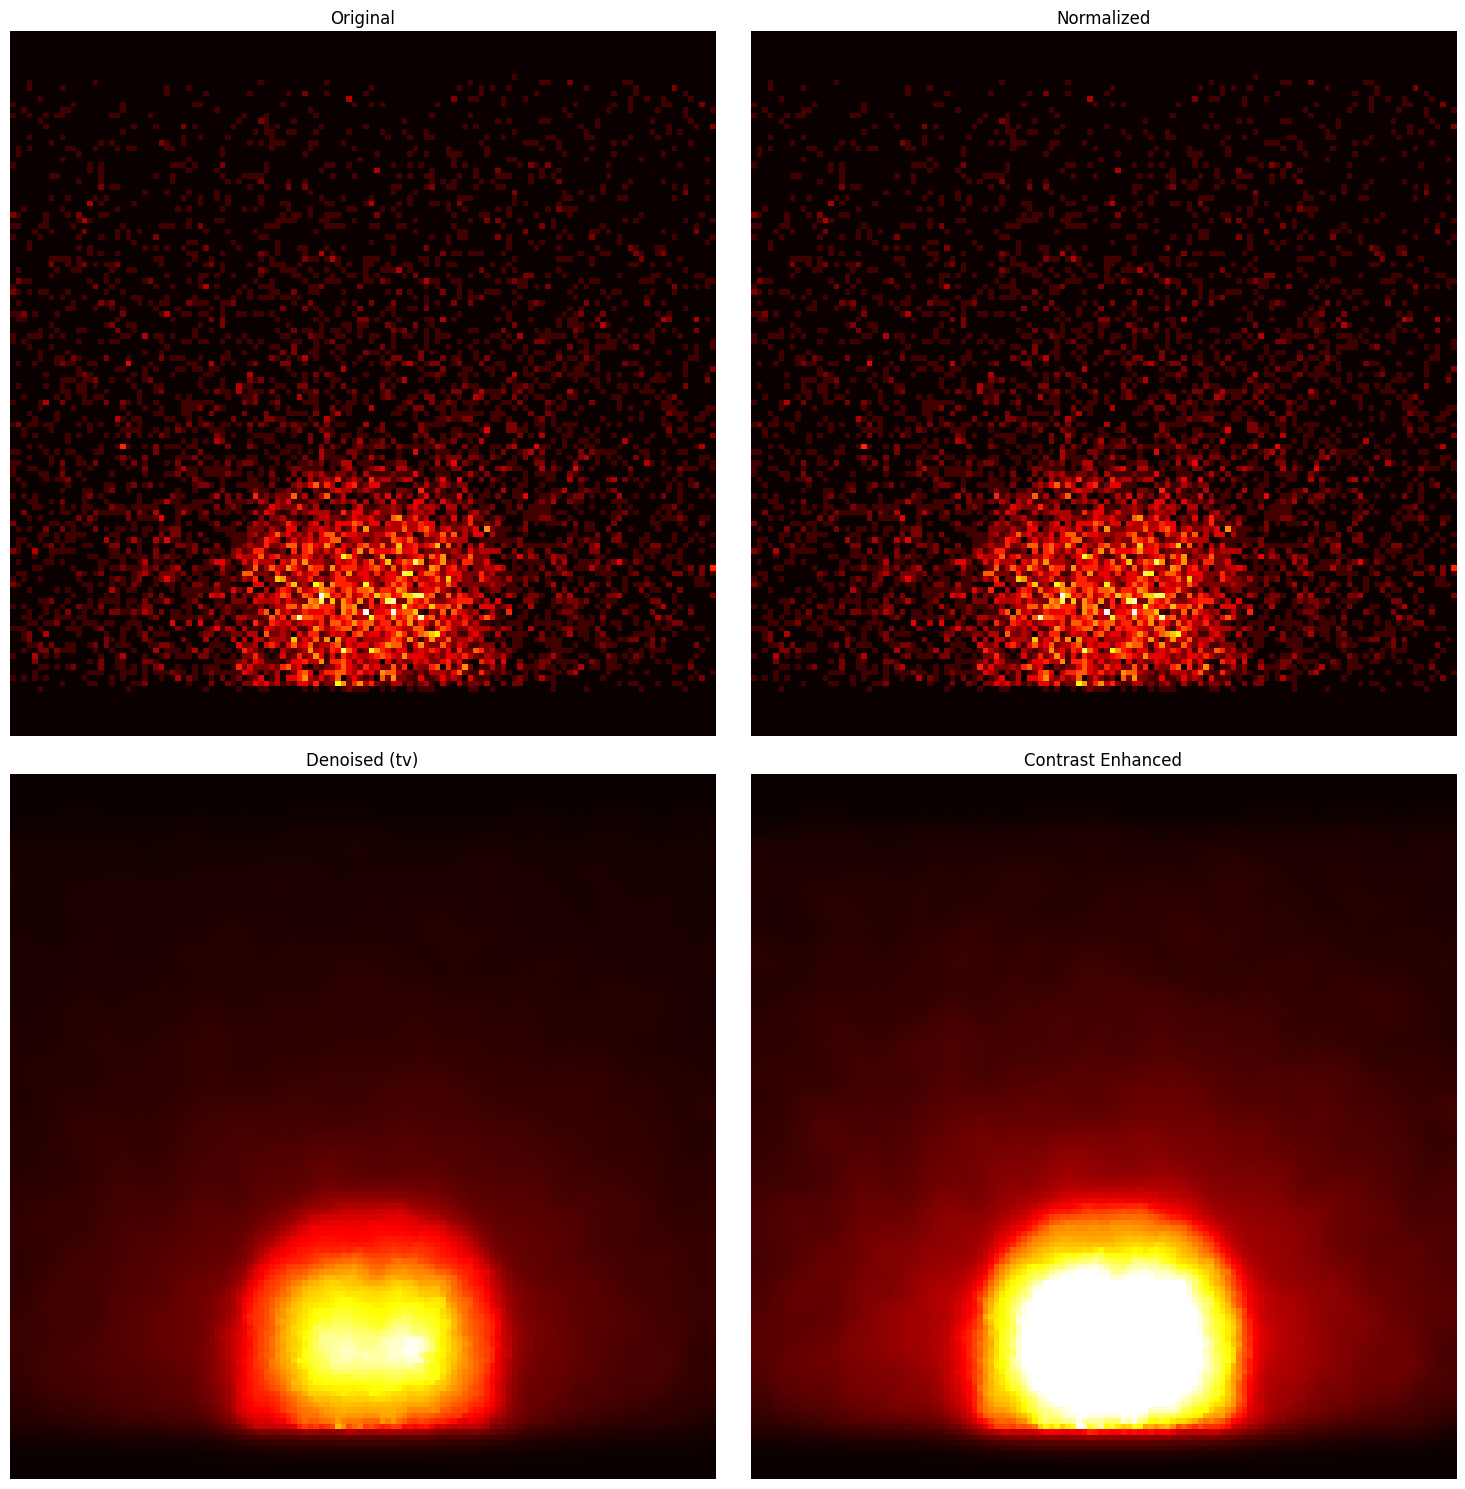

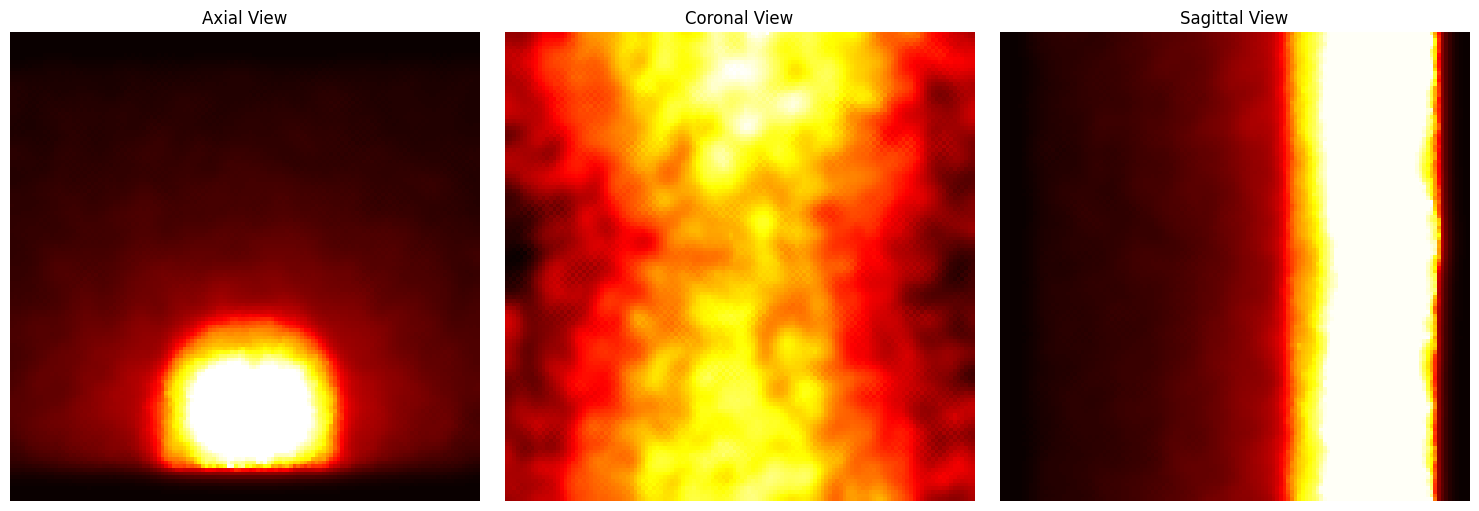


Applying gaussian denoising...


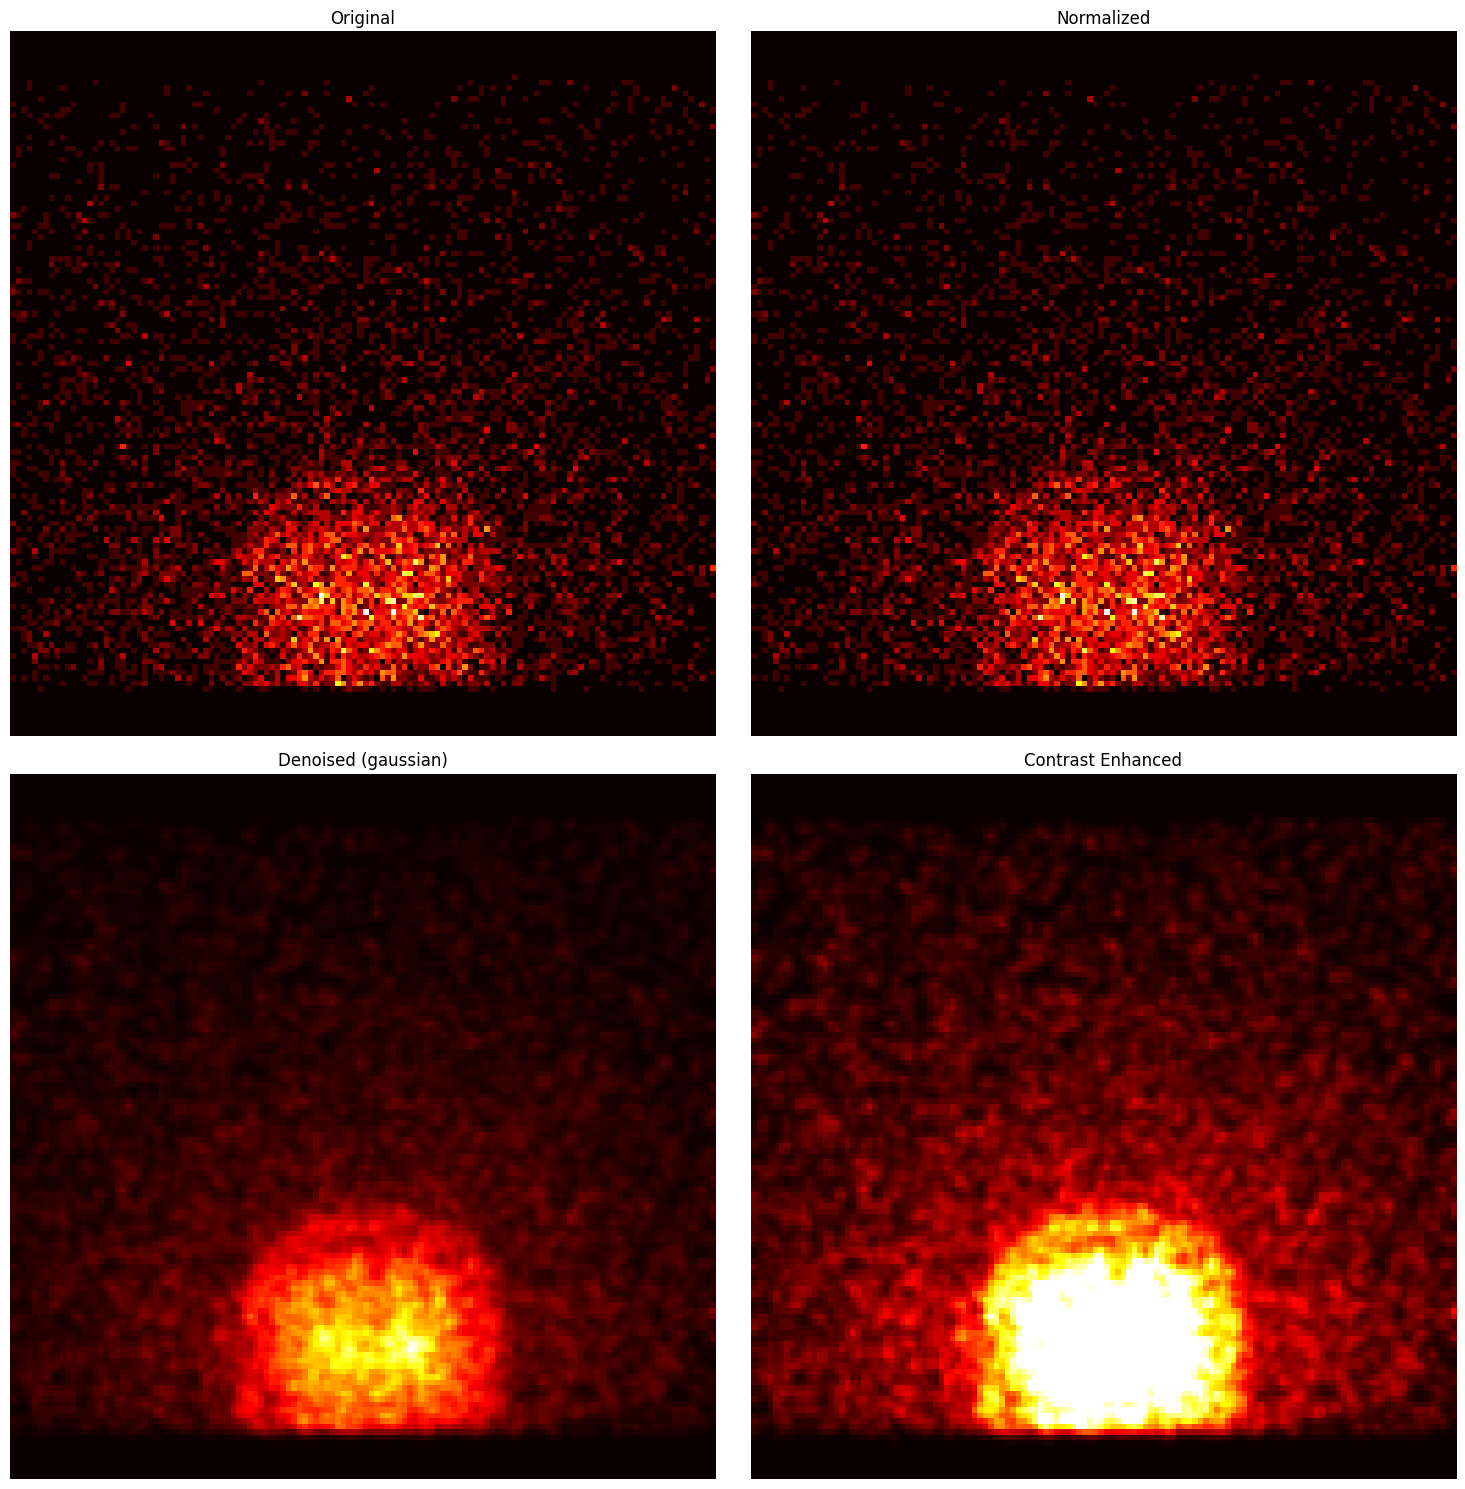

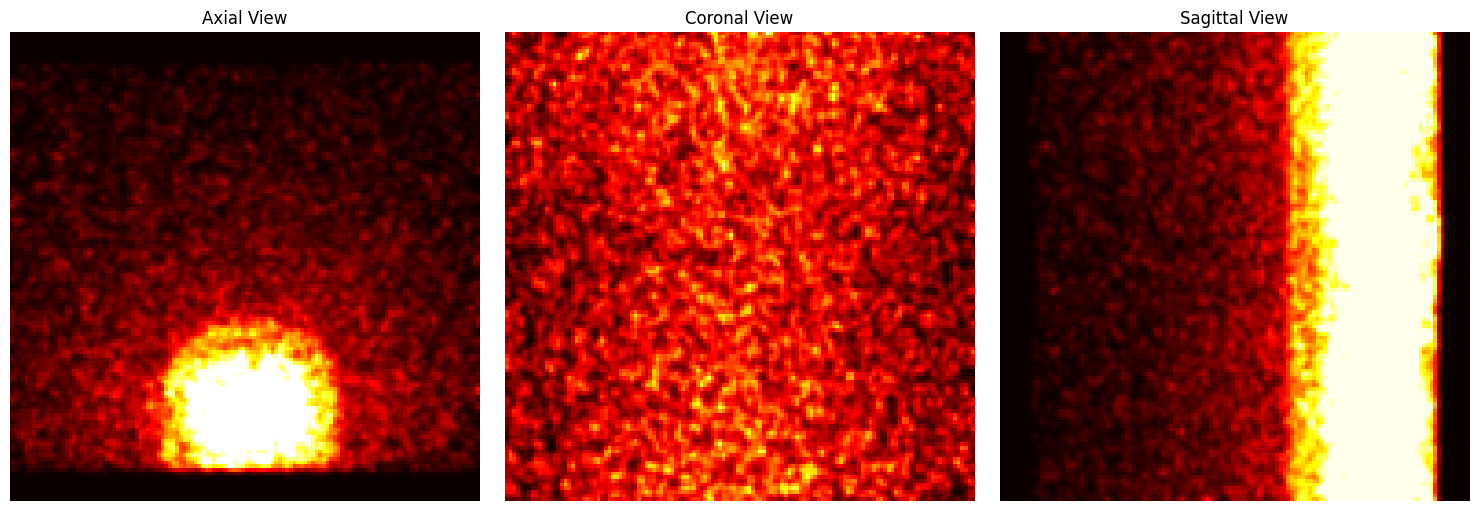


Processing PPMI_3765_NM__br_raw_20240528081514274_.dcm...

Applying tv denoising...


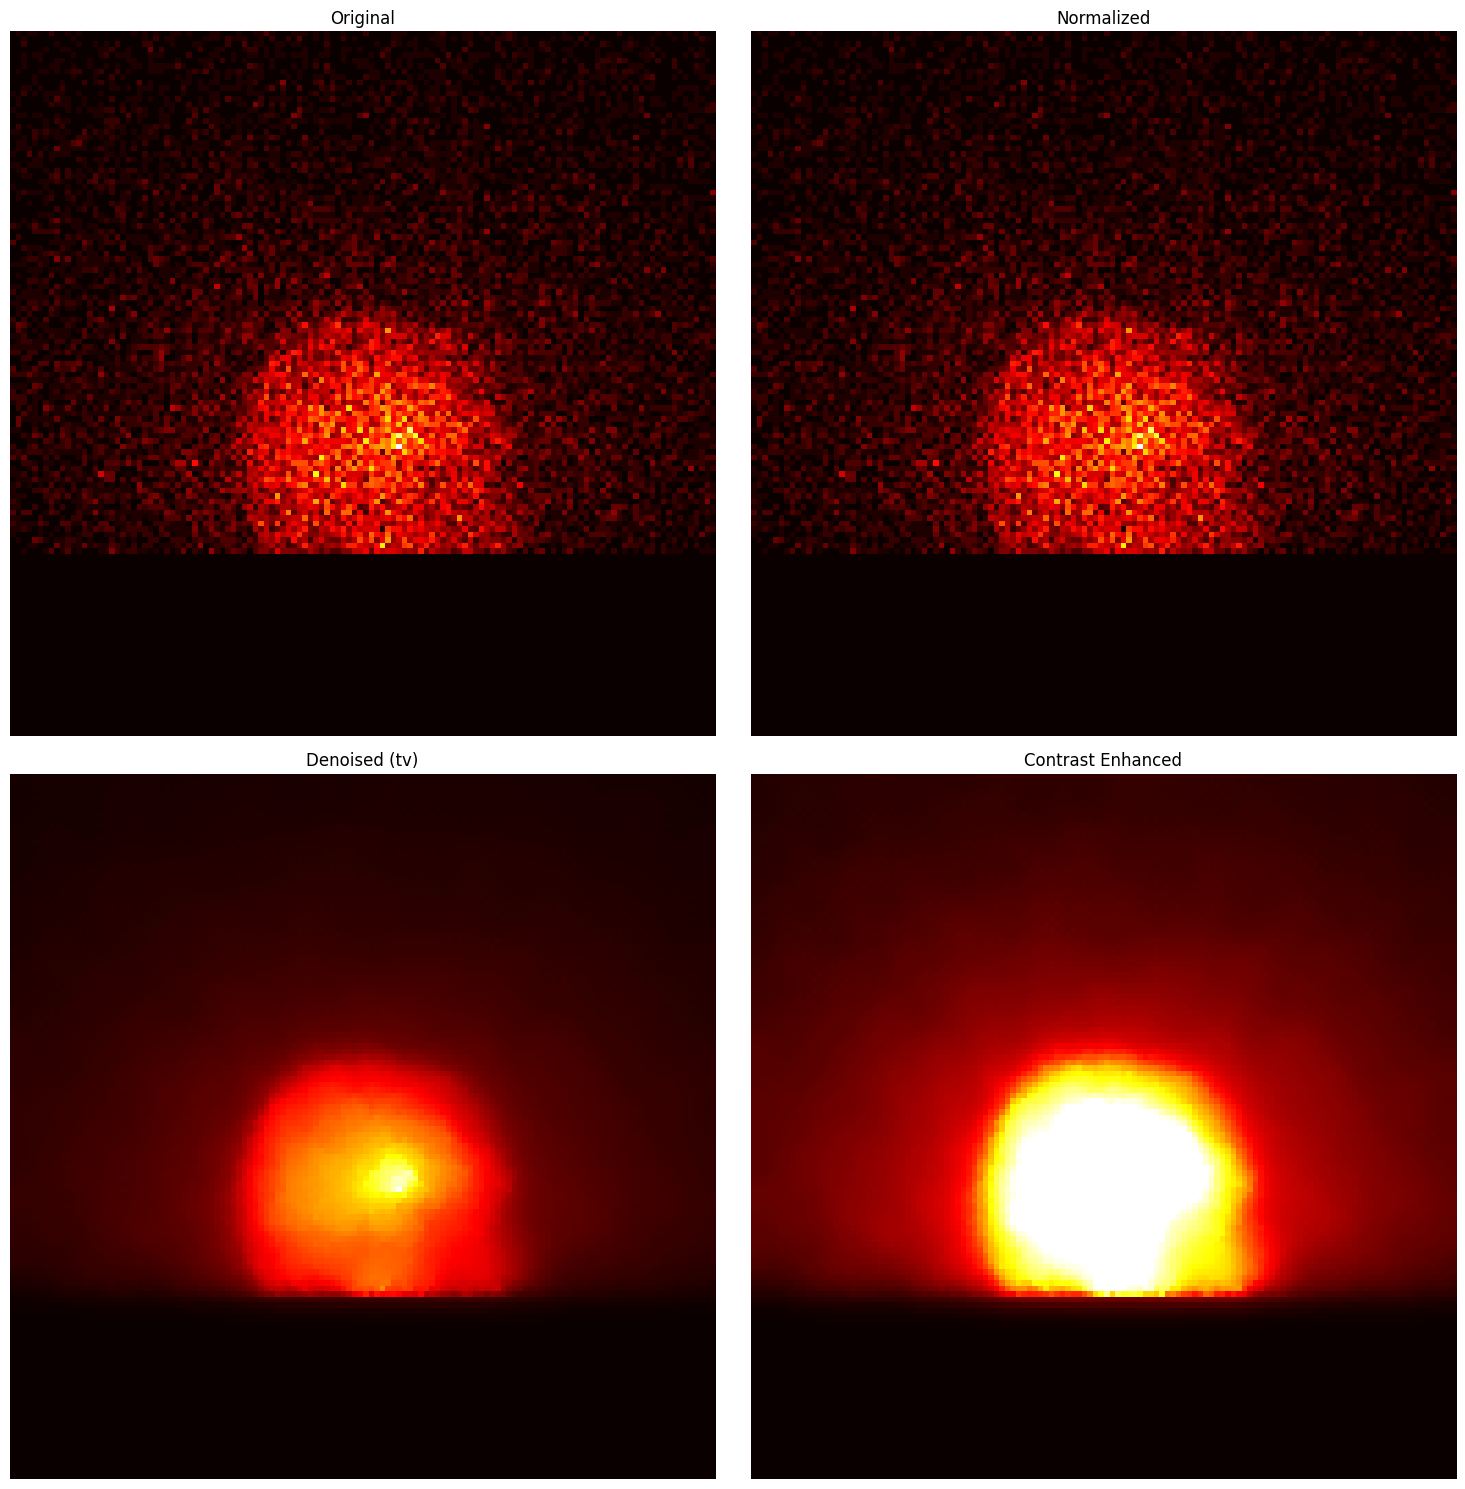

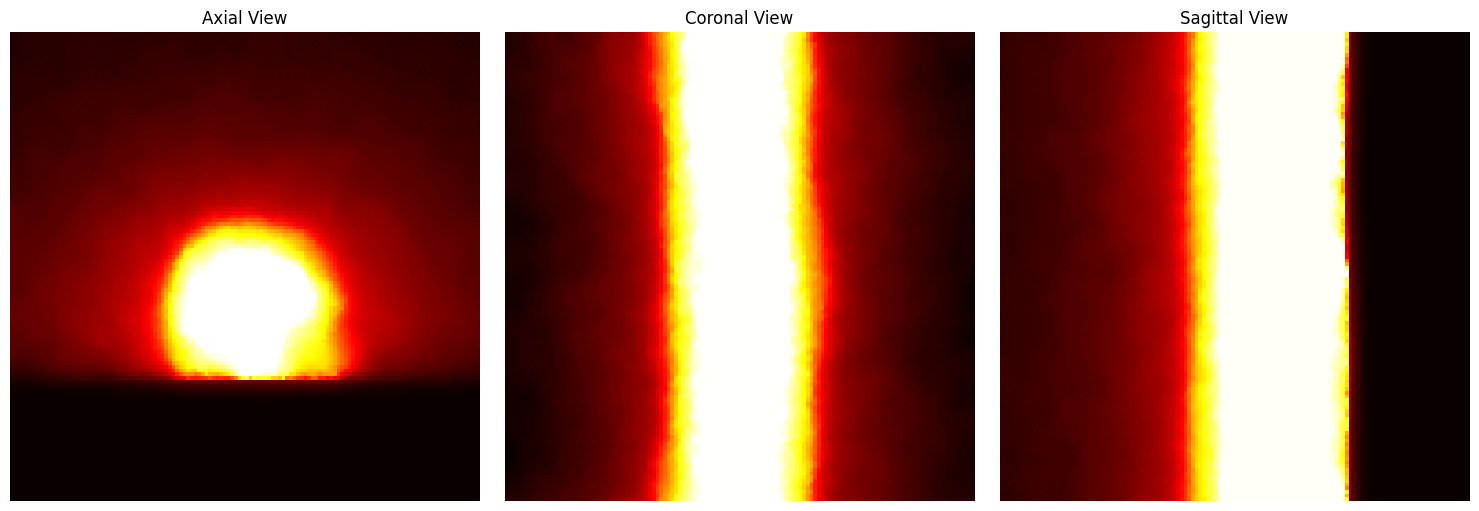


Applying gaussian denoising...


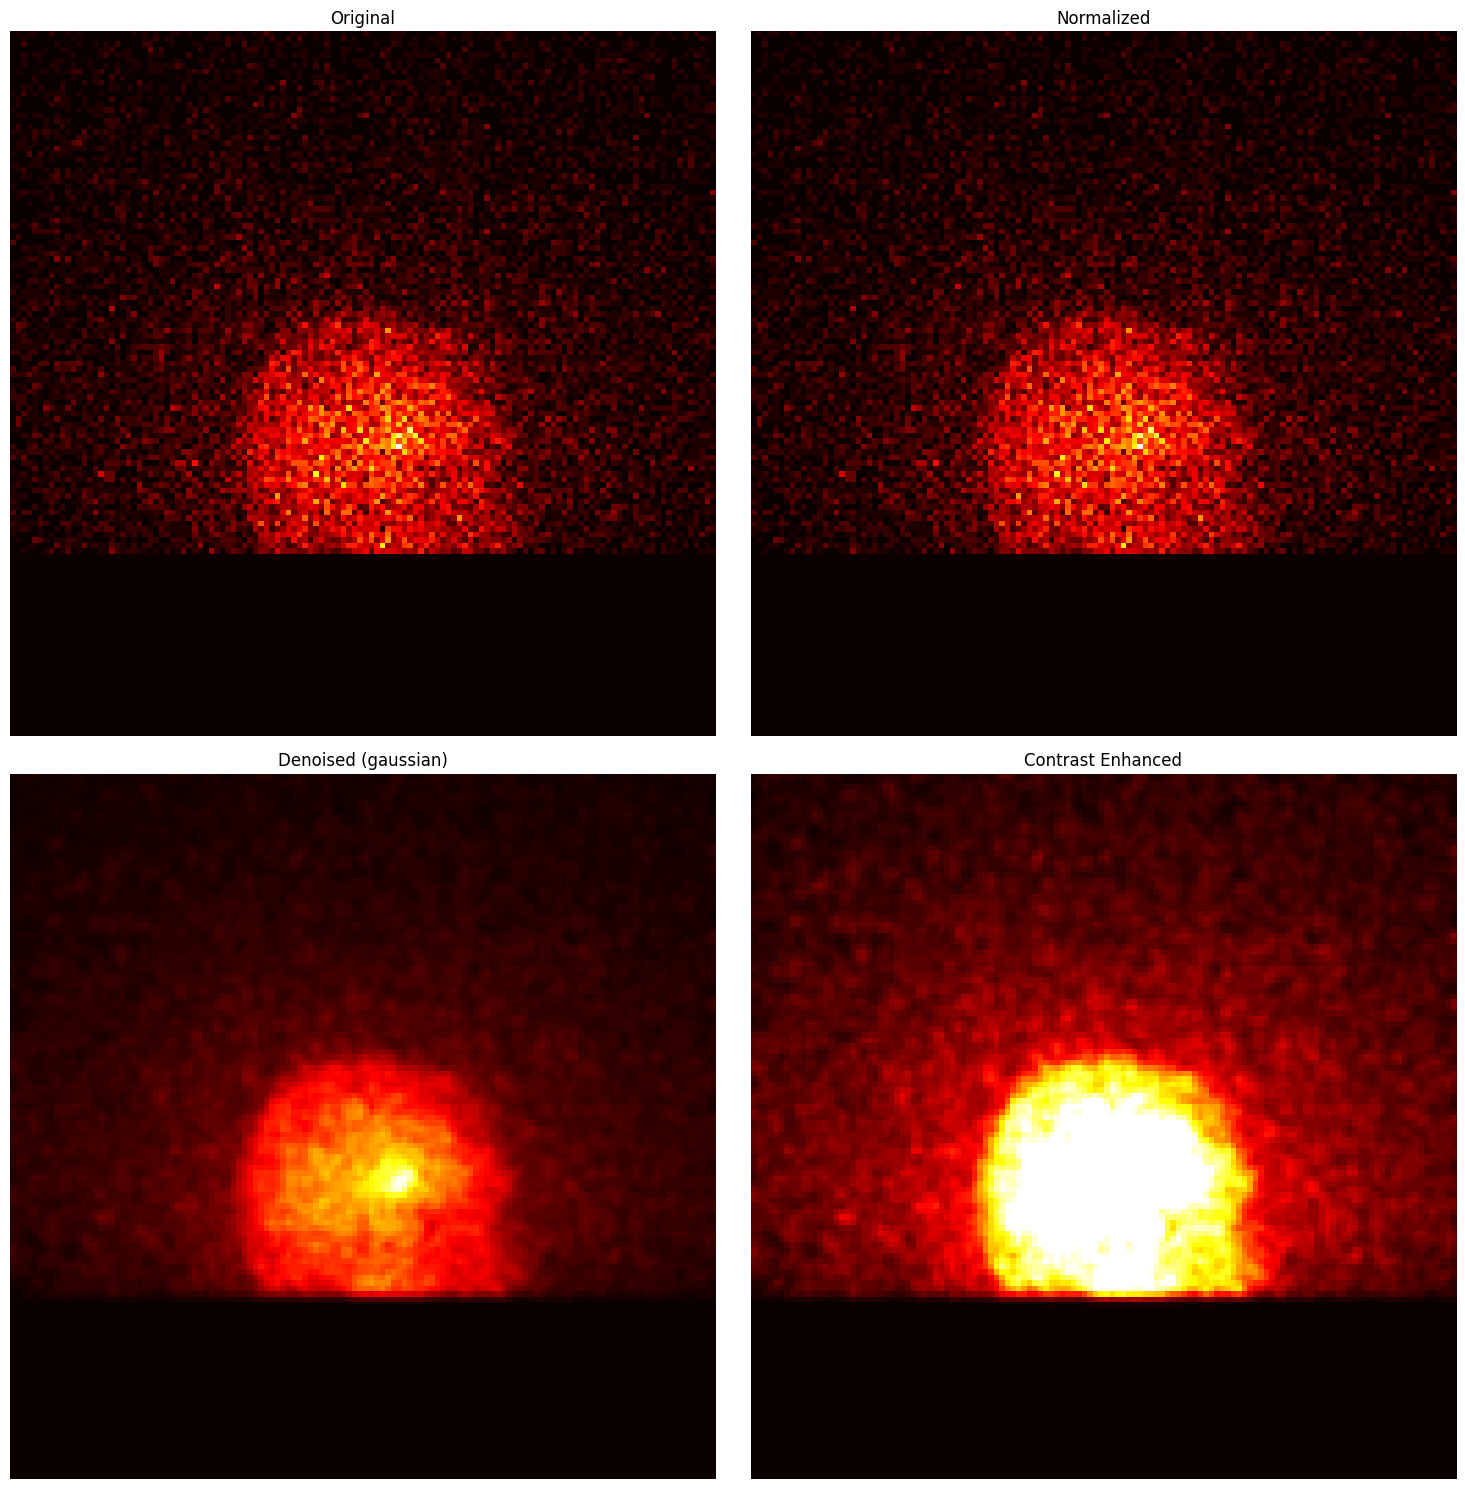

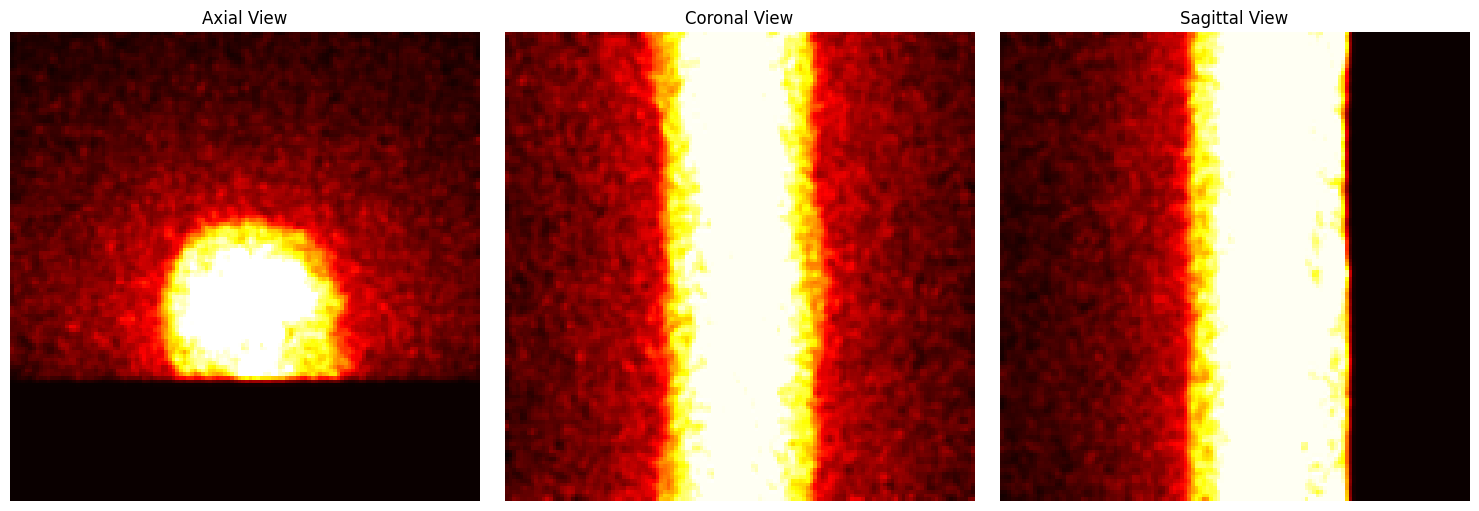

In [9]:
import numpy as np
import pydicom
from typing import Tuple, Dict
from scipy import ndimage
from skimage.restoration import denoise_tv_chambolle
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import os

class DaTScanProcessor:
    def __init__(self, 
                 target_shape: Tuple[int, int, int] = (128, 128, 128),
                 denoising_method: str = 'tv'):
        """
        Initialize the DaTSCAN processor.
        
        Args:
            target_shape: Desired output shape for the volume
            denoising_method: One of ['tv', 'gaussian']
        """
        self.target_shape = target_shape
        self.denoising_method = denoising_method
        
    def load_and_preprocess(self, file_path: str) -> Dict:
        ds = pydicom.dcmread(file_path)
        img = ds.pixel_array.astype(float)
        processed_img = self._preprocess_pipeline(img)
        mid_slices = self._extract_mid_slices(processed_img)
        
        return {
            'volume': processed_img,
            'mid_slices': mid_slices,
            'metadata': self._extract_metadata(ds)
        }
    
    def _preprocess_pipeline(self, img: np.ndarray) -> np.ndarray:
        img = self._normalize_intensity(img)
        img = self._apply_denoising(img)
        img = self._enhance_contrast(img)
        
        if img.shape != self.target_shape:
            img = self._resize_volume(img)
            
        return img
    
    def _normalize_intensity(self, img: np.ndarray) -> np.ndarray:
        img = img_as_float(img)
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        return img
    
    def _apply_denoising(self, img: np.ndarray) -> np.ndarray:
        if self.denoising_method == 'tv':
            return denoise_tv_chambolle(img, weight=0.1, channel_axis=None)
        elif self.denoising_method == 'gaussian':
            return ndimage.gaussian_filter(img, sigma=0.8)
        else:
            raise ValueError(f"Unknown denoising method: {self.denoising_method}")
    
    def _enhance_contrast(self, img: np.ndarray) -> np.ndarray:
        # Reduced contrast enhancement
        p5, p95 = np.percentile(img, (5, 95))
        img = np.clip(img, p5, p95)
        img = (img - p5) / (p95 - p5)
        return img
    
    def _resize_volume(self, img: np.ndarray) -> np.ndarray:
        zoom_factors = tuple(t/c for t, c in zip(self.target_shape, img.shape))
        return ndimage.zoom(img, zoom_factors, order=3)
    
    def _extract_mid_slices(self, img: np.ndarray) -> Dict[str, np.ndarray]:
        z, y, x = [shape//2 for shape in img.shape]
        return {
            'axial': img[z],
            'coronal': img[:, y],
            'sagittal': img[:, :, x]
        }
    
    def _extract_metadata(self, ds: pydicom.dataset.FileDataset) -> Dict:
        return {
            'patient_id': getattr(ds, 'PatientID', 'unknown'),
            'study_date': getattr(ds, 'StudyDate', 'unknown'),
            'manufacturer': getattr(ds, 'Manufacturer', 'unknown'),
            'scanner_model': getattr(ds, 'ManufacturerModelName', 'unknown'),
            'pixel_spacing': getattr(ds, 'PixelSpacing', None),
            'slice_thickness': getattr(ds, 'SliceThickness', None)
        }
    
    def visualize_preprocessing_steps(self, file_path: str):
        ds = pydicom.dcmread(file_path)
        original = ds.pixel_array.astype(float)
        mid_slice = original[original.shape[0]//2]
        
        normalized = self._normalize_intensity(original)
        denoised = self._apply_denoising(normalized)
        enhanced = self._enhance_contrast(denoised)
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))
        
        axes[0, 0].imshow(mid_slice, cmap='hot')
        axes[0, 0].set_title('Original')
        axes[0, 0].axis('off')
        
        axes[0, 1].imshow(normalized[normalized.shape[0]//2], cmap='hot')
        axes[0, 1].set_title('Normalized')
        axes[0, 1].axis('off')
        
        axes[1, 0].imshow(denoised[denoised.shape[0]//2], cmap='hot')
        axes[1, 0].set_title(f'Denoised ({self.denoising_method})')
        axes[1, 0].axis('off')
        
        axes[1, 1].imshow(enhanced[enhanced.shape[0]//2], cmap='hot')
        axes[1, 1].set_title('Contrast Enhanced')
        axes[1, 1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_views(self, processed_data: Dict):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        views = ['axial', 'coronal', 'sagittal']
        
        for ax, view in zip(axes, views):
            ax.imshow(processed_data['mid_slices'][view], cmap='hot')
            ax.set_title(f'{view.capitalize()} View')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    processors = {
        'tv': DaTScanProcessor(denoising_method='tv'),
        'gaussian': DaTScanProcessor(denoising_method='gaussian')
    }
    
    image_folder = "Images"
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]
    
    for image_file in image_files:
        file_path = os.path.join(image_folder, image_file)
        print(f"\nProcessing {image_file}...")
        
        for method, processor in processors.items():
            print(f"\nApplying {method} denoising...")
            try:
                processor.visualize_preprocessing_steps(file_path)
                processed_data = processor.load_and_preprocess(file_path)
                processor.visualize_views(processed_data)
            except Exception as e:
                print(f"Error processing file with {method}: {e}")


Processing PPMI_149940_NM_TOMO_br_raw_20240726080256845_.dcm...

Applying tv denoising...


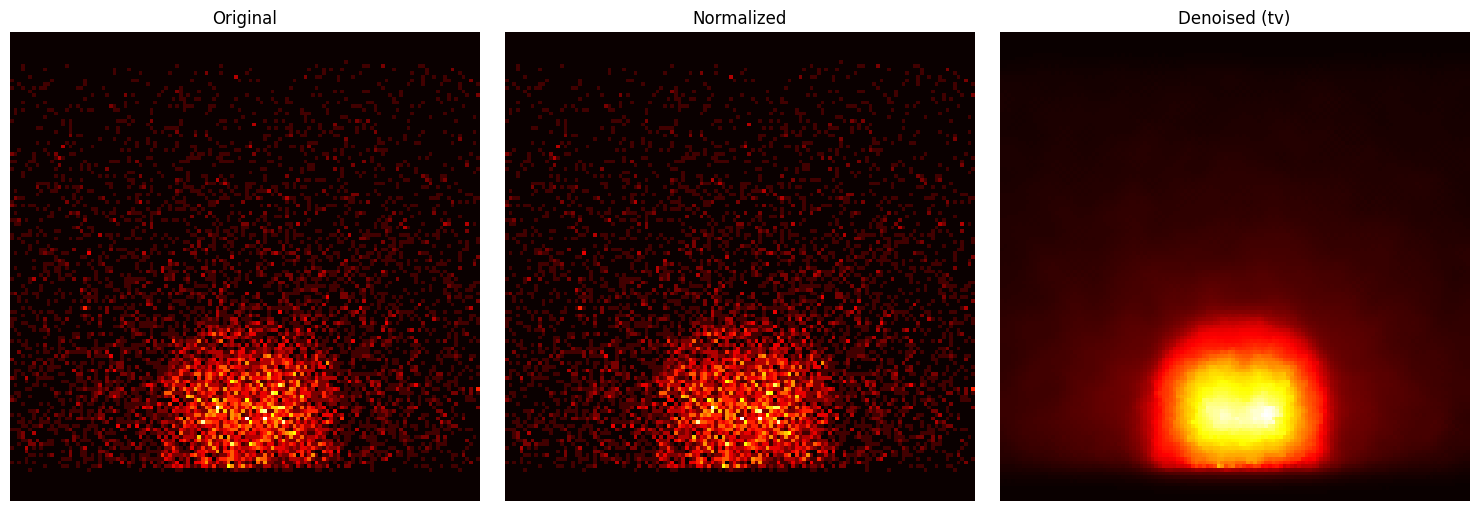

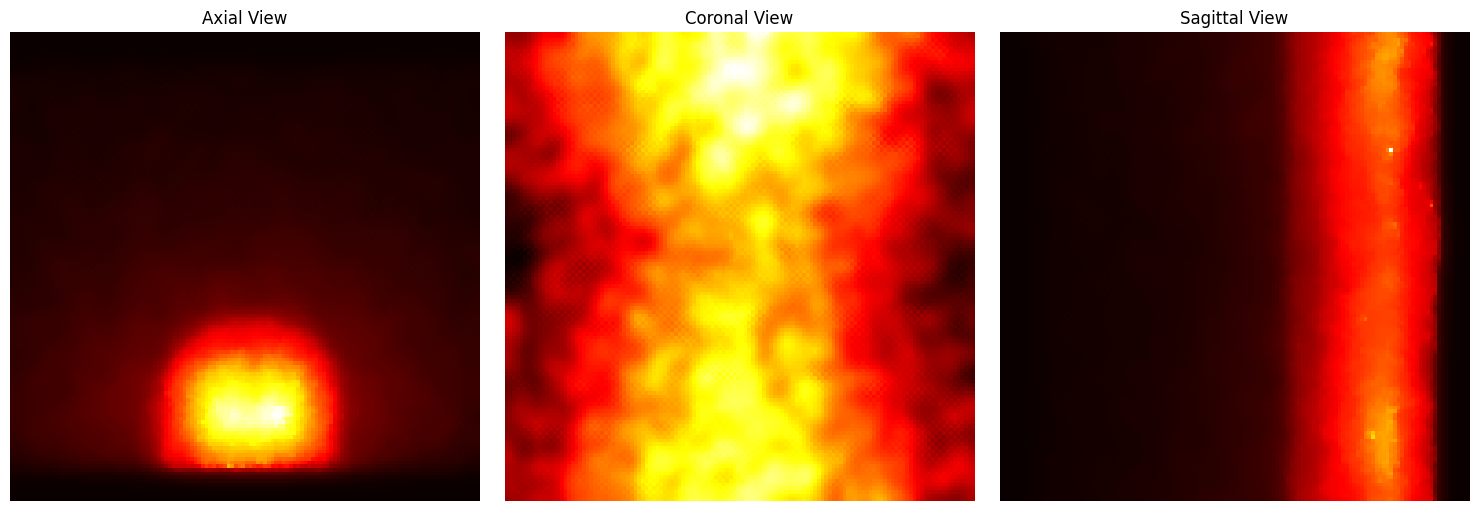


Applying gaussian denoising...


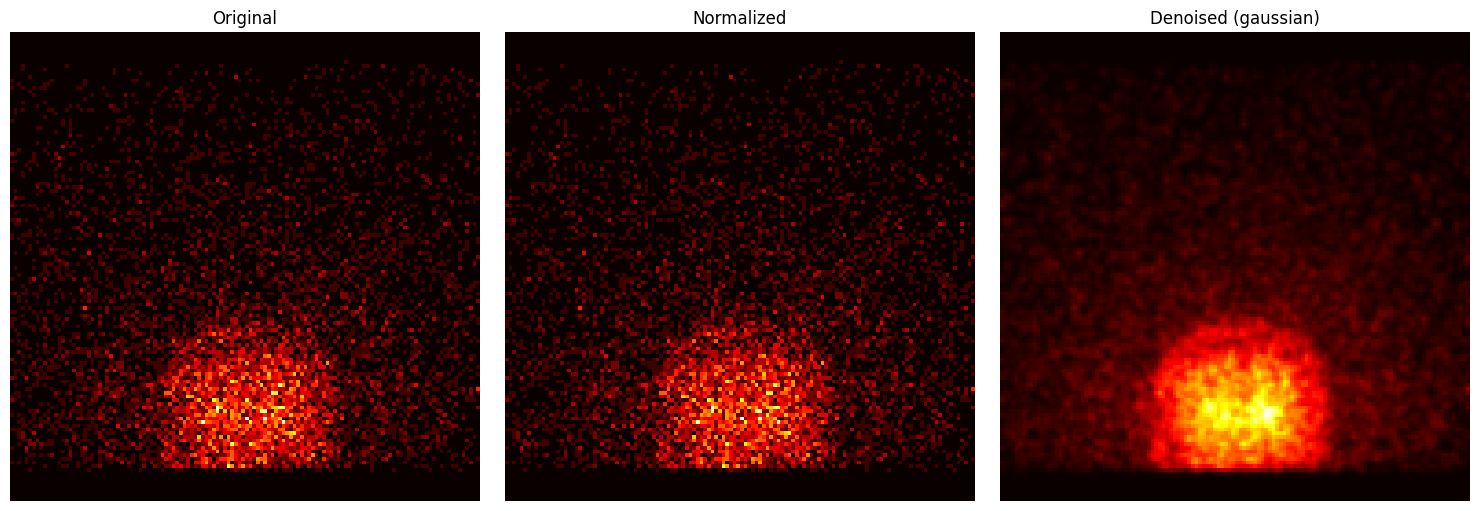

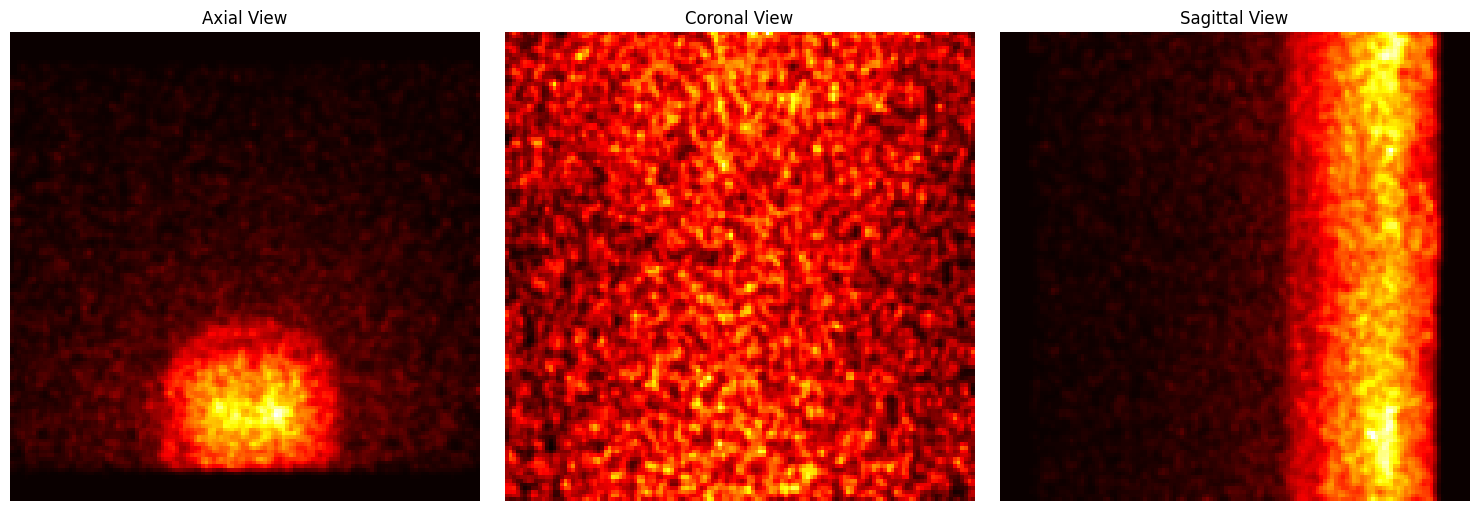


Processing PPMI_3765_NM__br_raw_20240528081514274_.dcm...

Applying tv denoising...


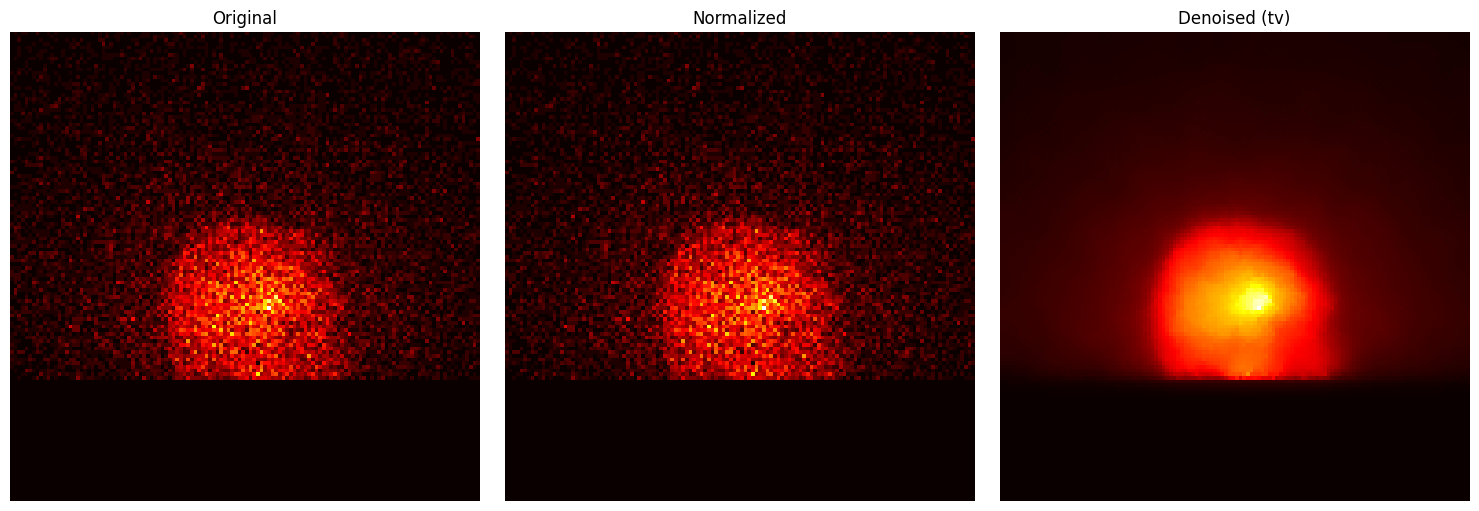

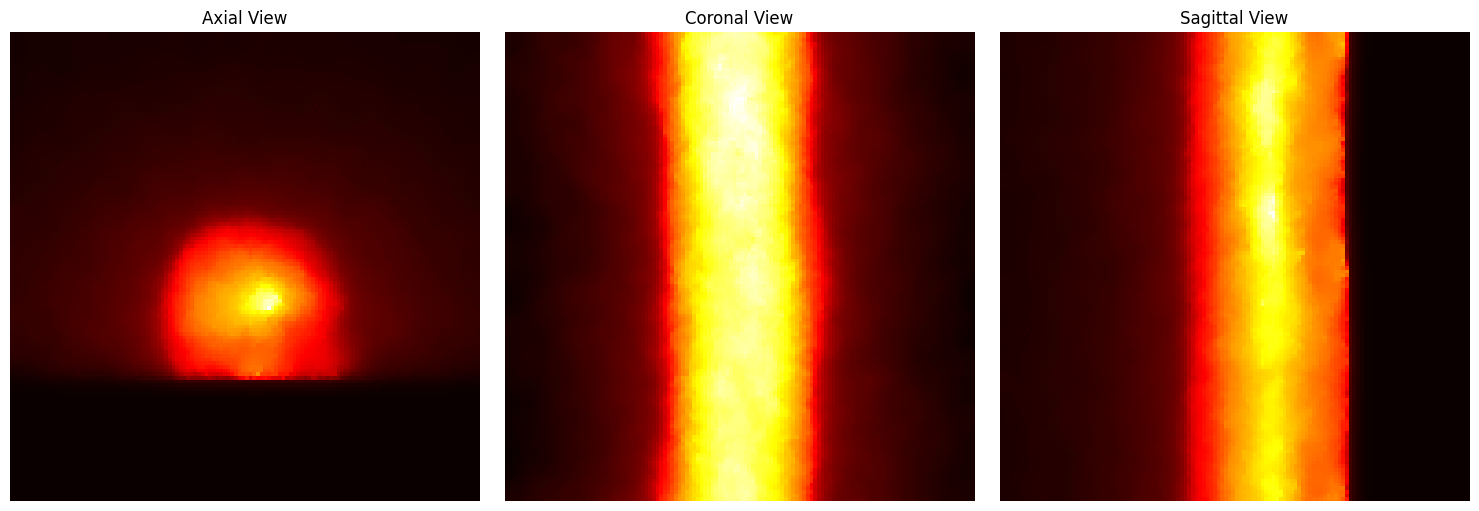


Applying gaussian denoising...


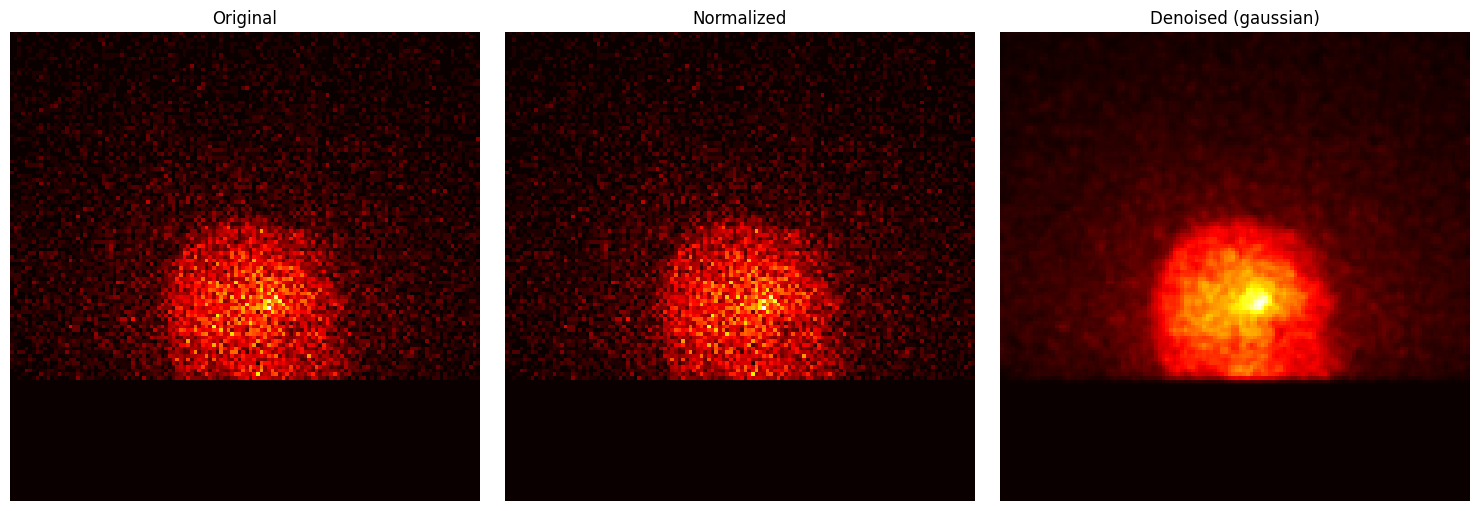

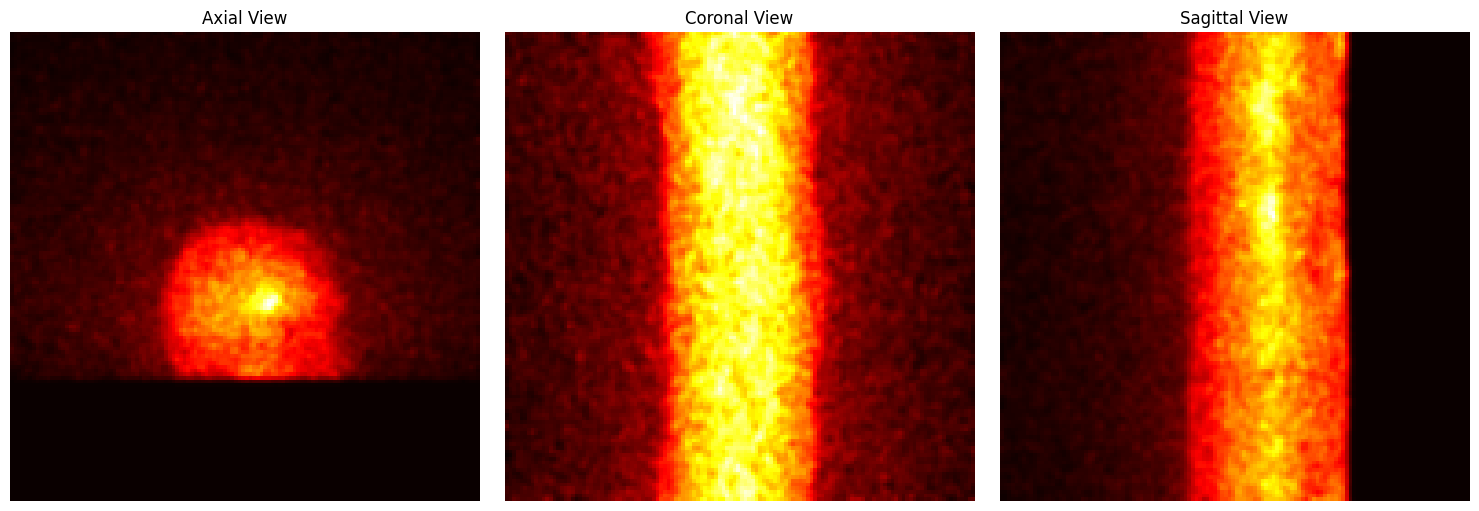

In [11]:
import numpy as np
import pydicom
from typing import Tuple, Dict
from scipy import ndimage
from skimage.restoration import denoise_tv_chambolle
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import os

class DaTScanProcessor:
    def __init__(self, 
                 target_shape: Tuple[int, int, int] = (128, 128, 128),
                 denoising_method: str = 'tv'):
        self.target_shape = target_shape
        self.denoising_method = denoising_method
        
    def load_and_preprocess(self, file_path: str) -> Dict:
        ds = pydicom.dcmread(file_path)
        img = ds.pixel_array.astype(float)
        processed_img = self._preprocess_pipeline(img)
        mid_slices = self._extract_mid_slices(processed_img)
        
        return {
            'volume': processed_img,
            'mid_slices': mid_slices,
            'metadata': self._extract_metadata(ds)
        }
    
    def _preprocess_pipeline(self, img: np.ndarray) -> np.ndarray:
        img = self._normalize_intensity(img)
        img = self._apply_denoising(img)
        
        if img.shape != self.target_shape:
            img = self._resize_volume(img)
            
        return img
    
    def _normalize_intensity(self, img: np.ndarray) -> np.ndarray:
        img = img_as_float(img)
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        return img
    
    def _apply_denoising(self, img: np.ndarray) -> np.ndarray:
        if self.denoising_method == 'tv':
            return denoise_tv_chambolle(img, weight=0.1, channel_axis=None)
        elif self.denoising_method == 'gaussian':
            return ndimage.gaussian_filter(img, sigma=0.8)
        else:
            raise ValueError(f"Unknown denoising method: {self.denoising_method}")
    
    def _resize_volume(self, img: np.ndarray) -> np.ndarray:
        zoom_factors = tuple(t/c for t, c in zip(self.target_shape, img.shape))
        return ndimage.zoom(img, zoom_factors, order=3)
    
    def _extract_mid_slices(self, img: np.ndarray) -> Dict[str, np.ndarray]:
        z, y, x = [shape//2 for shape in img.shape]
        return {
            'axial': img[z],
            'coronal': img[:, y],
            'sagittal': img[:, :, x]
        }
    
    def _extract_metadata(self, ds: pydicom.dataset.FileDataset) -> Dict:
        return {
            'patient_id': getattr(ds, 'PatientID', 'unknown'),
            'study_date': getattr(ds, 'StudyDate', 'unknown'),
            'manufacturer': getattr(ds, 'Manufacturer', 'unknown'),
            'scanner_model': getattr(ds, 'ManufacturerModelName', 'unknown'),
            'pixel_spacing': getattr(ds, 'PixelSpacing', None),
            'slice_thickness': getattr(ds, 'SliceThickness', None)
        }
    
    def visualize_preprocessing_steps(self, file_path: str):
        ds = pydicom.dcmread(file_path)
        original = ds.pixel_array.astype(float)
        mid_slice = original[original.shape[0]//2]
        
        normalized = self._normalize_intensity(original)
        denoised = self._apply_denoising(normalized)
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(mid_slice, cmap='hot')
        axes[0].set_title('Original')
        axes[0].axis('off')
        
        axes[1].imshow(normalized[normalized.shape[0]//2], cmap='hot')
        axes[1].set_title('Normalized')
        axes[1].axis('off')
        
        axes[2].imshow(denoised[denoised.shape[0]//2], cmap='hot')
        axes[2].set_title(f'Denoised ({self.denoising_method})')
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_views(self, processed_data: Dict):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        views = ['axial', 'coronal', 'sagittal']
        
        for ax, view in zip(axes, views):
            ax.imshow(processed_data['mid_slices'][view], cmap='hot')
            ax.set_title(f'{view.capitalize()} View')
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

# Usage example
if __name__ == "__main__":
    processors = {
        'tv': DaTScanProcessor(denoising_method='tv'),
        'gaussian': DaTScanProcessor(denoising_method='gaussian')
    }
    
    image_folder = "Images"
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.dcm')]
    
    for image_file in image_files:
        file_path = os.path.join(image_folder, image_file)
        print(f"\nProcessing {image_file}...")
        
        for method, processor in processors.items():
            print(f"\nApplying {method} denoising...")
            try:
                processor.visualize_preprocessing_steps(file_path)
                processed_data = processor.load_and_preprocess(file_path)
                processor.visualize_views(processed_data)
            except Exception as e:
                print(f"Error processing file with {method}: {e}")